## 1.Introduction

**1.1 Business Problem**

DataCo Global is currently navigating a critical strategic inflection point where operational friction is directly undermining commercial growth. The business faces a dual-threat to its long-term profitability:

- **The Service-Value Gap:** There is a systemic disconnect between our Market Promises and Logistical Execution. High Late Delivery Rates (LDR) are no longer just an operational hurdle; they represent a significant threat to Customer Lifetime Value (CLV). In a competitive global market, unreliability acts as a "silent churn" factor, eroding the brand equity required to sustain premium pricing.

- **Lack of Portfolio Intelligence:** Despite a robust catalog, the organization suffers from Revenue Blind Spots. Without a data-driven differentiation between Strategic Volume Anchors (high-traffic) and High-Margin Profit Drivers (niche), resource allocation remains sub-optimal. We are currently treating all revenue streams equally, failing to prioritize the "Cash Cows" that sustain our global operations.

- **Untapped Transactional Synergy:** The absence of a quantified Cross-Selling Framework means we are leaving significant revenue on the table. In an era of rising fulfillment costs, maximizing the Average Order Value (AOV) through data-backed product clustering is no longer optional—it is a financial necessity to protect our net margins.

**1.2 Analytical Approach: Net Margin Optimisation**

This dataset was treated as a blueprint for Margin Optimisation by breaking the misalignment between logistics and commercial performance. Our framework is to identify where fulfillment inefficiencies bleed cash and where data-driven commercial strategies can reclaim that lost margin.

- **Phase 1: Quantifying Revenue Leakage:** By analysing Lead-time variance and Late Delivery Rates (LDR) as financial risks rather than a logistical ones, we pinpoint where the "trust-gap" triggers customer churn.
    - Impact: Allowing the COO to prioritise regional recalibrations that protect brand equity and long-term retention.

- **Phase 2: Portfolio Stratification & Strategic Priority (ABC Analysis):** We apply ABC/Pareto (80/20) logic to categorise products by their Contribution Margin and Sales Velocity. This ensures resource allocation is tied to financial stability rather than raw order counts.

    - Impact: Enabling the CFO to protect the 20% of the portfolio that secures 80% of the firm's stability.

- **Phase 3: Transactional Synergy & AOV Expansion:** We utilise the Apriori Algorithm to decode purchase affinities and design "Efficiency Bundles".
    - Impact: Allowing the Commercial Director to expand net margins even in the face of rising global fulfillment costs.

In summary, our approach is built on the Unit Economics Framework to optimise Net Margin. We integrate Lead-time Variance/LDR (Phase 1) to stop "Revenue Leakage" (by identifying the operational friction that triggers customer churn and refund liabilities), ABC Stratification (Phase 2) to protect the high-margin Revenue Core, and Association Rule Learning (Phase 3) to expand Average Order Value (AOV). By aligning these methodologies, we ensure the analysis addresses the entire Value Chain, from operational reliability to margin expansion.



**1.3 Executive Summary**


**Key Findings:**



- **Strategic Roadmap:**

In order to implement the following analysis, some core libraries are imported for data processing, statistical modelling, and visualisation.

In [ ]:
#Import the pandas library as pd for data manipulation
import pandas as pd

#Import Numpy library as mp for numerical operations
import numpy as np

#Import matplotlib as plt for data visualisation
import matplotlib.pyplot as plt

#Import seaborn as sns for data visualization
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2. Data Inspection

One of the very first step needs to be focused before analysing the dataset is to inspect the dataset we are using. This step involves loading the raw transactional dataset and performing a preliminary audit. The objective is to verify data integrity, understand the feature schema, and ensure the dataset is structurally sound for the subsequent logistics and financial analyses.

In [ ]:
#Load Dataset
df_raw=pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='latin1')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
#Check shape
df_raw.shape

(180519, 53)

The dataset has 180519 records across 53 variables, providing a robust sample size for statistical analysis.

We now preview the first five rows of the dataset to gain a high-level overview of the record formatting and categorical distributions.

In [ ]:
df_raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


The dataset contains 53 variables; however, as our primary focus is on logistical efficiency and financial risk, we will now exclude redundant columns to streamline the analysis and enhance processing clarity.

In [ ]:
#Selecting Essential Variables

essential_cols = [
    #Logistics/ Operations
    'Days for shipping (real)', 'Days for shipment (scheduled)', 'shipping date (DateOrders)','Shipping Mode', 'Delivery Status', 'Late_delivery_risk', 'Order Status','Order Region', 'Order Country', 'Order City', 'Market',

    #Sales/ Marketing (Market Basket)
    'Order Id', 'Category Name', 'Product Name', 'Order Item Quantity',
    'Sales', 'Order Item Total', 'Order Item Discount','Order Item Profit Ratio', 'Benefit per order', 'Sales per customer', 'Order Item Product Price', 'Order Profit Per Order',

    #Time & Customer Segmentation
    'order date (DateOrders)', 'Customer Segment'
]

df = df_raw[essential_cols].copy()
print(f"raw dataframe: {df_raw.shape}")
print(f"new dataframe: {df.shape}")
print(f"Duplicate: {df.duplicated().sum()}")
display(df.head())

raw dataframe: (180519, 53)
new dataframe: (180519, 25)
Duplicate: 0


,Days for shipping (real),Days for shipment (scheduled),shipping date (DateOrders),Shipping Mode,Delivery Status,Late_delivery_risk,Order Status,Order Region,Order Country,Order City,Market,Order Id,Category Name,Product Name,Order Item Quantity,Sales,Order Item Total,Order Item Discount,Order Item Profit Ratio,Benefit per order,Sales per customer,Order Item Product Price,Order Profit Per Order,order date (DateOrders),Customer Segment
0,3,4,2/3/2018 22:56,Standard Class,Advance shipping,0,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,77202,Sporting Goods,Smart watch,1,327.75,314.640015,13.110000,0.29,91.250000,314.640015,327.75,91.250000,1/31/2018 22:56,Consumer
1,5,4,1/18/2018 12:27,Standard Class,Late delivery,1,PENDING,South Asia,India,Bikaner,Pacific Asia,75939,Sporting Goods,Smart watch,1,327.75,311.359985,16.389999,-0.80,-249.089996,311.359985,327.75,-249.089996,1/13/2018 12:27,Consumer
2,4,4,1/17/2018 12:06,Standard Class,Shipping on time,0,CLOSED,South Asia,India,Bikaner,Pacific Asia,75938,Sporting Goods,Smart watch,1,327.75,309.720001,18.030001,-0.80,-247.779999,309.720001,327.75,-247.779999,1/13/2018 12:06,Consumer
3,3,4,1/16/2018 11:45,Standard Class,Advance shipping,0,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,75937,Sporting Goods,Smart watch,1,327.75,304.809998,22.940001,0.08,22.860001,304.809998,327.75,22.860001,1/13/2018 11:45,Home Office
4,2,4,1/15/2018 11:24,Standard Class,Advance shipping,0,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,75936,Sporting Goods,Smart watch,1,327.75,298.250000,29.500000,0.45,134.210007,298.250000,327.75,134.210007,1/13/2018 11:24,Corporate


We now audit the data types and verify that there are no missing values across out selected features, ensuring the dataset is clean and ready for analytical process.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   shipping date (DateOrders)     180519 non-null  object 
 3   Shipping Mode                  180519 non-null  object 
 4   Delivery Status                180519 non-null  object 
 5   Late_delivery_risk             180519 non-null  int64  
 6   Order Status                   180519 non-null  object 
 7   Order Region                   180519 non-null  object 
 8   Order Country                  180519 non-null  object 
 9   Order City                     180519 non-null  object 
 10  Market                         180519 non-null  object 
 11  Order Id                       180519 non-null  int64  
 12  Category Name                 

The summary confirms a complete dataset with zero null values across all 21 columns. We note that temporal features (shipping and order dates) are currently stored as object types and will require conversion to datetime format for subsequent time-series analysis.

We now standardise data types and segment the features into Numerical, Categorical, and Datetime groups. This classification ensures accurate statistical treatment and provides a structured framework for the subsequent analysis phases.

In [ ]:
# A. Date Columns (Time-series features)
#Converting to datetime objects for accurate trend analysis
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])
date_cols = ['order date (DateOrders)','shipping date (DateOrders)']

# B. Categorical Columns (Classification features)
# Converting ID and Risk flag to string to treat them as labels, not numbers
df['Order Id'] = df['Order Id'].astype(str)
df['Late_delivery_risk'] = df['Late_delivery_risk'].astype(str)

cat_cols = [
    'Order Id', 'Late_delivery_risk', 'Shipping Mode', 'Delivery Status',
    'Order Status', 'Order Region', 'Order Country', 'Order City', 'Market',
    'Category Name', 'Product Name', 'Customer Segment'
]

# C. Numerical Columns (Quantitative features) used for statistical summary
num_cols = [
    'Days for shipping (real)', 'Days for shipment (scheduled)',
    'Sales', 'Order Item Total', 'Order Item Discount','Order Item Profit Ratio', 'Order Item Quantity', 'Benefit per order', 'Sales per customer', 'Order Item Product Price', 'Order Profit Per Order'
]
print(f"Numerical: {num_cols}")
print(f"Categorical: {cat_cols}")
print(f"Date: {date_cols}")

Numerical: ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Sales', 'Order Item Total', 'Order Item Discount', 'Order Item Profit Ratio', 'Order Item Quantity', 'Benefit per order', 'Sales per customer', 'Order Item Product Price', 'Order Profit Per Order']
Categorical: ['Order Id', 'Late_delivery_risk', 'Shipping Mode', 'Delivery Status', 'Order Status', 'Order Region', 'Order Country', 'Order City', 'Market', 'Category Name', 'Product Name', 'Customer Segment']
Date: ['order date (DateOrders)', 'shipping date (DateOrders)']


In [ ]:
#Recheck Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Days for shipping (real)       180519 non-null  int64         
 1   Days for shipment (scheduled)  180519 non-null  int64         
 2   shipping date (DateOrders)     180519 non-null  datetime64[ns]
 3   Shipping Mode                  180519 non-null  object        
 4   Delivery Status                180519 non-null  object        
 5   Late_delivery_risk             180519 non-null  object        
 6   Order Status                   180519 non-null  object        
 7   Order Region                   180519 non-null  object        
 8   Order Country                  180519 non-null  object        
 9   Order City                     180519 non-null  object        
 10  Market                         180519 non-null  object        
 11  

We re-examine the .info() summary to confirm that all type conversions were successful and that the variables are now correctly partitioned for numerical and categorical processing.

In [ ]:
#Check Statistical Information

#1.Describe Numerical data
print("\nNumerical Description:")
display(df[num_cols].describe())

#2.Describe Categorical data
print("\nCategorical Description:")
display(df[cat_cols].describe())

#3.Describe Time data
print("\nTime Description:")
print(f"Start Date: {df[date_cols[0]].min()}")
print(f"End Date: {df[date_cols[0]].max()}")
print(f"Duration: {df[date_cols[0]].max() - df[date_cols[0]].min()}")


Numerical Description:


,Days for shipping (real),Days for shipment (scheduled),Sales,Order Item Total,Order Item Discount,Order Item Profit Ratio,Order Item Quantity,Benefit per order,Sales per customer,Order Item Product Price,Order Profit Per Order
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,203.772096,183.107609,20.664741,0.120647,2.127638,21.974989,183.107609,141.232550,21.974989
std,1.623722,1.374449,132.273077,120.043670,21.800901,0.466796,1.453451,104.433526,120.043670,139.732492,104.433526
min,0.000000,0.000000,9.990000,7.490000,0.000000,-2.750000,1.000000,-4274.979980,7.490000,9.990000,-4274.979980
25%,2.000000,2.000000,119.980003,104.379997,5.400000,0.080000,1.000000,7.000000,104.379997,50.000000,7.000000
50%,3.000000,4.000000,199.919998,163.990005,14.000000,0.270000,1.000000,31.520000,163.990005,59.990002,31.520000
75%,5.000000,4.000000,299.950012,247.399994,29.990000,0.360000,3.000000,64.800003,247.399994,199.990005,64.800003
max,6.000000,4.000000,1999.989990,1939.989990,500.000000,0.500000,5.000000,911.799988,1939.989990,1999.989990,911.799988



Categorical Description:


,Order Id,Late_delivery_risk,Shipping Mode,Delivery Status,Order Status,Order Region,Order Country,Order City,Market,Category Name,Product Name,Customer Segment
count,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519
unique,65752,2,4,4,9,23,164,3597,5,50,118,3
top,50290,1,Standard Class,Late delivery,COMPLETE,Central America,Estados Unidos,Santo Domingo,LATAM,Cleats,Perfect Fitness Perfect Rip Deck,Consumer
freq,5,98977,107752,98977,59491,28341,24840,2211,51594,24551,24515,93504



Time Description:
Start Date: 2015-01-01 00:00:00
End Date: 2018-01-31 23:38:00
Duration: 1126 days 23:38:00


Finally, we perform a targeted null-value audit across our refined feature set to ensure no data gaps were introduced during the filtering or conversion stages

In [ ]:
#Check Missing Values
display(df.isnull().sum())

,0
Days for shipping (real),0
Days for shipment (scheduled),0
shipping date (DateOrders),0
Shipping Mode,0
Delivery Status,0
Late_delivery_risk,0
Order Status,0
Order Region,0
Order Country,0
Order City,0


The audit confirms zero missing values across the dataset, validating the data's completeness and ensuring a seamless transition to the descriptive analysis stage

We now examine the unique values and distribution of key categorical features. This step provides a clearer understanding of our market composition and operational categories, ensuring the labels are consistent before proceeding to deeper analysis.

In [ ]:
# Check unique values and their frequency for all categorical columns
for col in ['Category Name', 'Customer Segment', 'Shipping Mode', 'Delivery Status', 'Market']:
    print(f"--- Analysis for column: {col} ---")
    print(df[col].value_counts())
    print("-" * 30)
    print(f"Unique Categories now: {df['Category Name'].nunique()}")

--- Analysis for column: Category Name ---
Category Name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Crafts                    484
Garden                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Elec

**Key Observations from Categorical Distribution:**

- Product Dominance: The inventory is highly concentrated, with top categories like Cleats, Men's Footwear, and Women's Apparel accounting for the majority of transaction volume.

- Customer & Market Reach: Most of the company's value driver is from Consumer segment, with LATAM and Europe emerge as the most active regional markets.

- Operational Insight: significant majority of orders are shipped via Standard Class, yet "Late delivery" is the most frequent status. This indicates a critical bottleneck in logistics that requires deeper investigation in the next phase.

Then the next step involves auditing the numerical variables for outliers. Identifying extreme values in shipping times, sales, or profits is essential to prevent statistical skew and ensure the reliability of the logistics and financial models

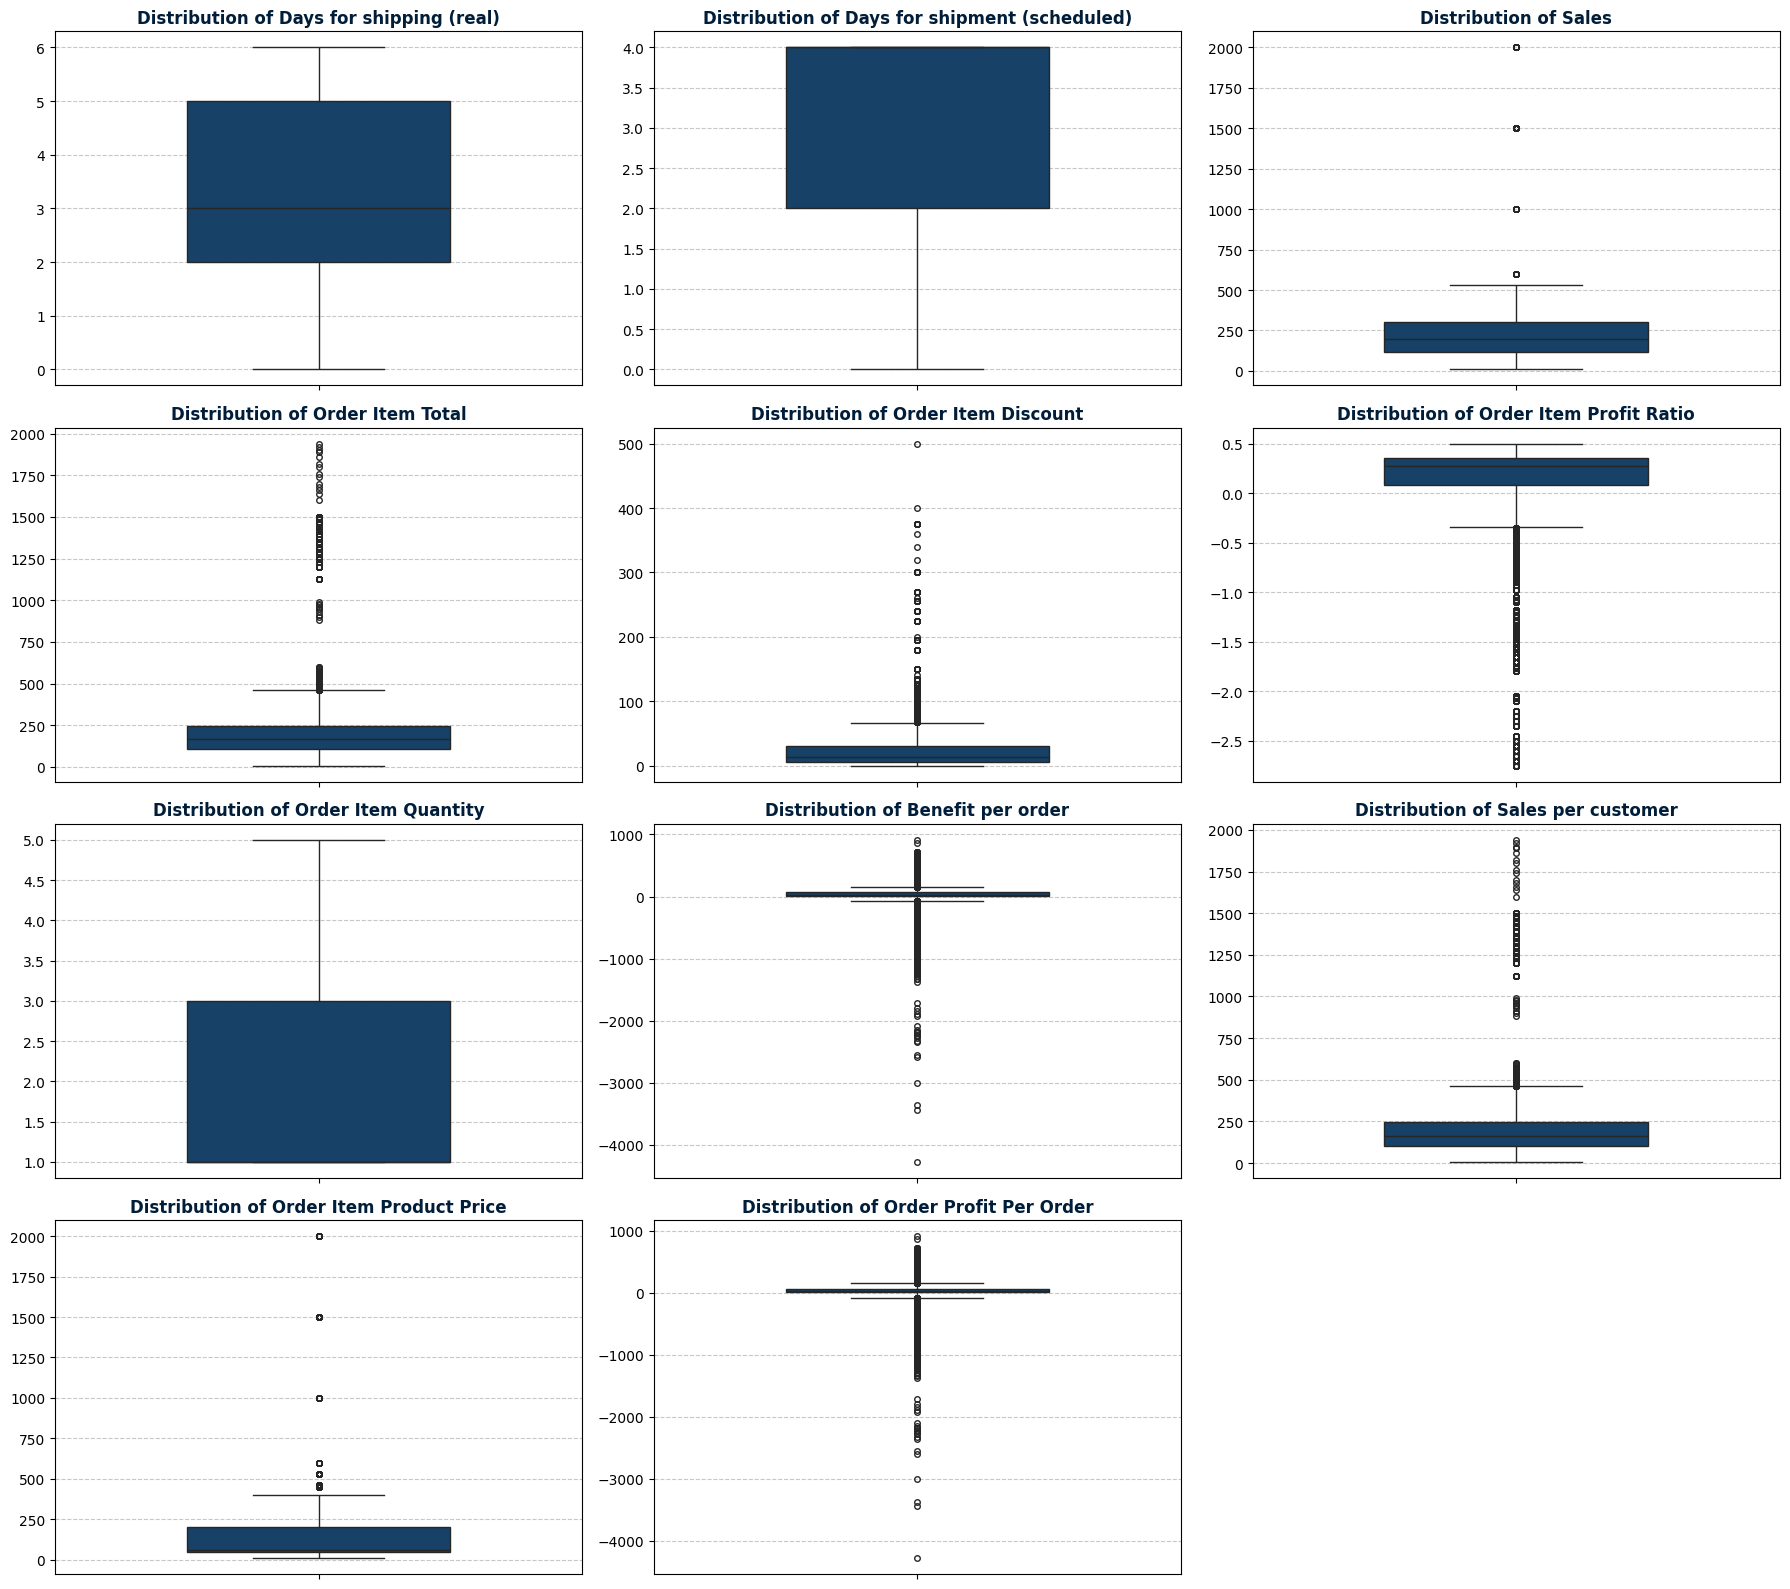

In [ ]:
#Check Outliers
import math

num_plots = len(num_cols)
cols_per_row = 3
rows = math.ceil(num_plots / cols_per_row)

plt.figure(figsize=(18,rows*4))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.boxplot(y=df[col], color='#0a4174', width=0.5, fliersize=4)
    plt.title(f"Distribution of {col}", fontsize=12, fontweight='bold', color='#001d39')
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The outlier inspection identifies structural inefficiencies and high-risk financial leaks within the current business model:

- **Financial Leakage (Profit & Benefit):** Both Order Item Profit Ratio and Benefit per order show extreme negative outliers, with losses plummeting to -4,000 per order. This confirms that optimizing net margin requires a "Stop-Loss" strategy rather than just driving sales.

- **Profitability:** The Profit Ratio shows a dangerous "lower tail" of outliers (losses down to -275%). These are "Profit-Drainers" that need to be isolated by Market/Category.

- **Operational Friction (Shipping Delays):** Days for shipping (real) ranges from 0 to 6 days, frequently exceeding the optimistic scheduled window of 2 to 4 days. This discrepancy is the root cause of the ~57% Late Delivery Rate (LDR) diagnosed in Phase 0.


**Conclusion:** The supply chain is physically stable but financially leaky due to aggressive discounting and specific high-loss transactions. Our subsequent analysis will focus on isolating these 'Profit-Drainers' and optimising the 'Delivery Bottlenecks' identified in the lead-time variance.

Then the number of transaction entries per month was examined to verify the continuity and regularity of the dataset, ensuring a stable foundation for the subsequent commercial and trend analysis.

In [ ]:
# Count entries per month
monthly_counts = df['order date (DateOrders)'].dt.to_period('M').value_counts().sort_index()
print("--- Number of records per month ---")
print(monthly_counts)



--- Number of records per month ---
order date (DateOrders)
2015-01    5322
2015-02    4729
2015-03    5362
2015-04    5126
2015-05    5357
2015-06    5134
2015-07    5299
2015-08    5273
2015-09    5140
2015-10    5302
2015-11    5235
2015-12    5371
2016-01    5317
2016-02    4894
2016-03    5210
2016-04    5097
2016-05    5302
2016-06    5054
2016-07    5305
2016-08    5334
2016-09    5160
2016-10    5398
2016-11    5210
2016-12    5269
2017-01    5217
2017-02    4906
2017-03    5347
2017-04    5212
2017-05    5317
2017-06    4951
2017-07    5318
2017-08    5305
2017-09    5189
2017-10    2255
2017-11    2055
2017-12    2124
2018-01    2123
Freq: M, Name: count, dtype: int64


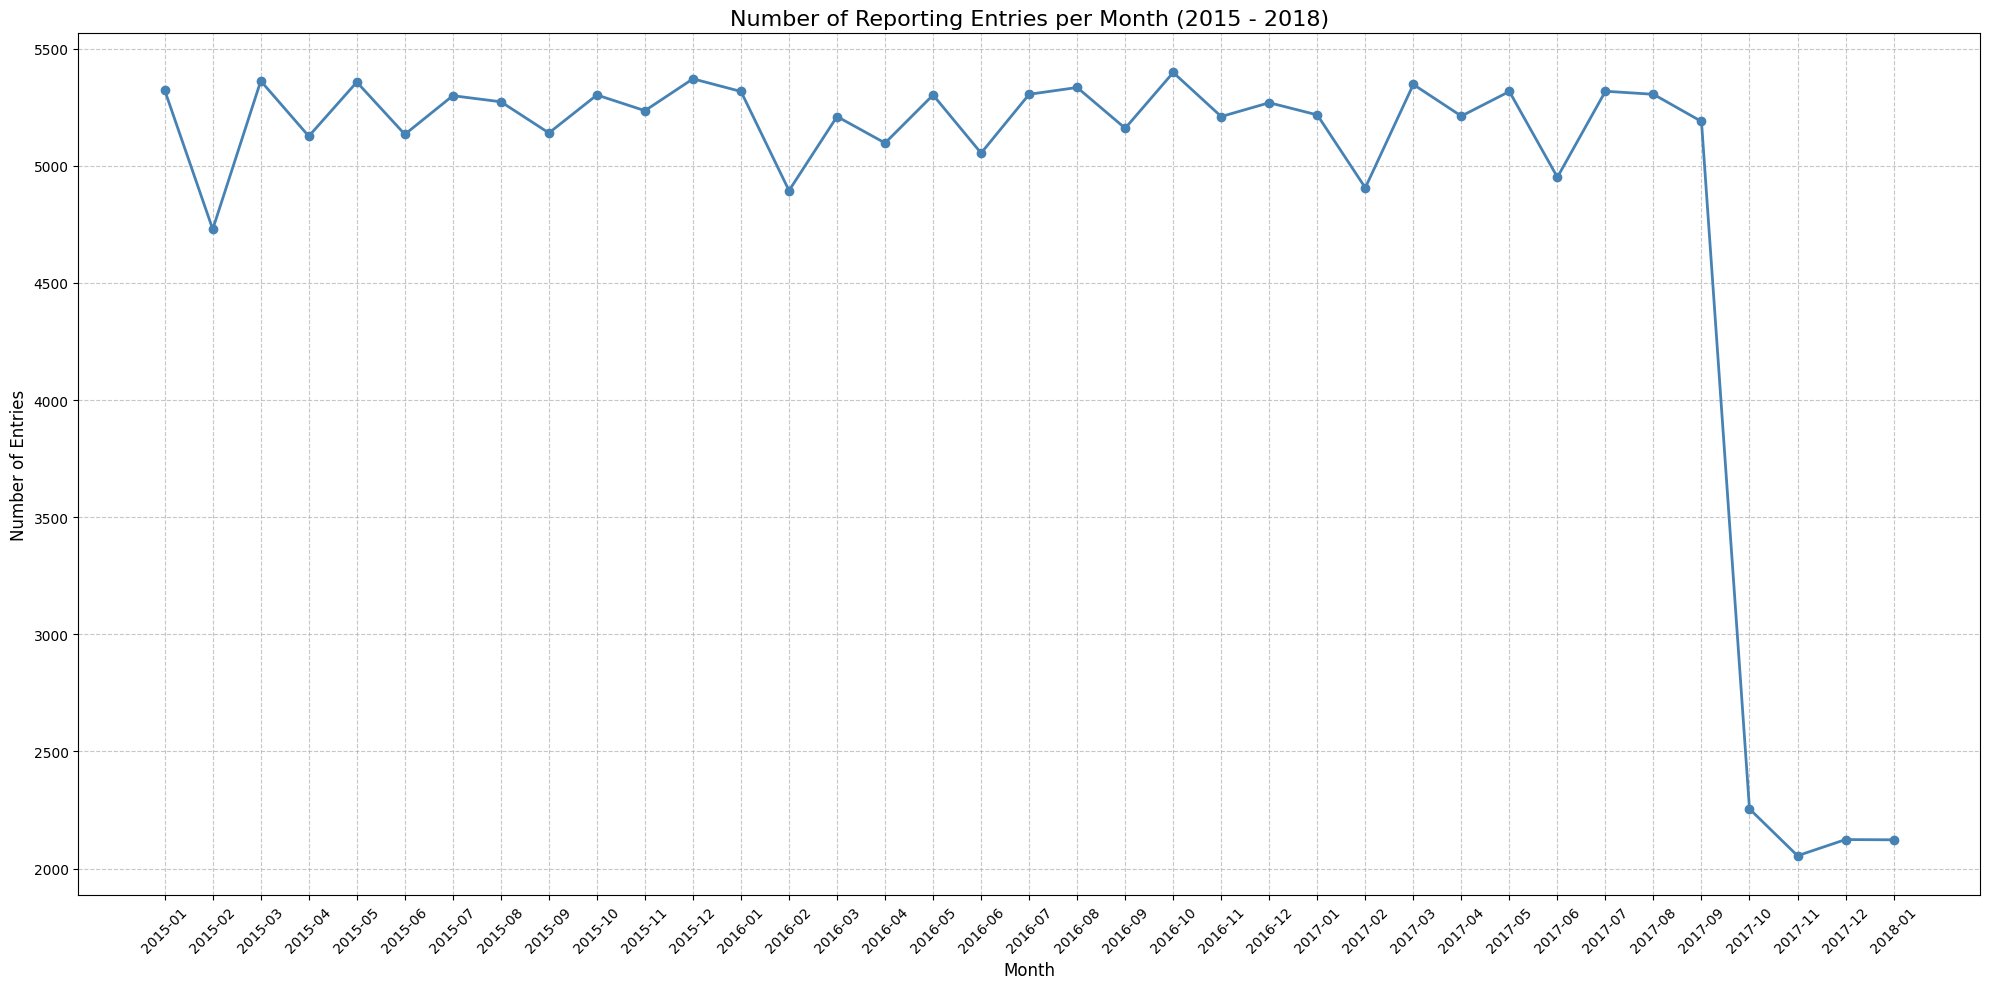

In [ ]:
#Plot entries per month count
plt.figure(figsize=(20, 10))
plt.plot(monthly_counts.index.astype(str), monthly_counts.values, marker='o',
         linestyle='-', color='steelblue', linewidth=2)


plt.title("Number of Reporting Entries per Month (2015 - 2018)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Entries", fontsize=12)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

**Observation**

While the dataset is continuous from 2015 to early 2018, there was a structural truncation starting in October 2017. Entry counts dropped by approximately 60%, from a stable average of ~2,300 to ~900 per month. This indicates a systematic data logging inconsistency rather than a decline in actual business performance, because 2 reasons:

- Abrupt vs. Gradual Decline: The drop occurred as an immediate, clean shift from one volume level to another within a single month. Actual market demand or business collapse typically follows a volatile or gradual decay curve.

- Stability Post-Drop: Post-October 2017, the records remain abnormally consistent at the new lower baseline (~900 entries). This lack of natural fluctuation suggests a technical filter or a change in the backend extraction logic (truncation) rather than a dynamic commercial downturn.

**Data Handling Strategy**

To maintain analytical accuracy despite this truncation, a three-step strategy would be implemented:

- Metric Shift: Average Order Value (AOV) and Profit Ratios were prioritised over absolute totals to ensure the 'thin' data does not skew performance insights.

- Baseline Focus: The high-density period (Jan 2015 - Sept 2017) is used as the primary engine for Market Basket Analysis to guarantee statistical significance.

- Validation: I treat the truncated months (Oct 2017 - Jan 2018) as a validation set to confirm that core consumer behaviors remain consistent across the entire timeline.


# 3. Data Preparation

With the initial audit complete, the dataset now undergoes formal preparation. This phase involves refining data types, and structuring the variables to ensure the data is fully optimised for the logistics and financial analysis.

To prevent data mismatches, we now perform text standardisation by removing leading/trailing whitespaces and special characters from categorical fields, ensuring consistent naming conventions for all products and regions.

In [ ]:
# ---TEXT CLEANING ---

# 1. Remove leading and trailing whitespaces from all categorical columns
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip()

# 2. Remove special characters if any
df['Product Name'] = df['Product Name'].str.replace('', '', regex=False)
df['Category Name'] = df['Category Name'].str.replace('', '', regex=False)

Next, the following step filters out logical inconsistencies, such as negative sales, zero quantities, or impossible shipping durations, to ensure the analysis is based solely on valid business transactions.

In [ ]:
# --- HANDLING ANOMALIES & LOGICAL ERRORS ---

# # Removing data that violates basic business or physical logic
initial_rows = df.shape[0]

df = df[
    (df['Sales'] > 0) &
    (df['Order Item Quantity'] > 0) &
    (df['Days for shipping (real)'] >= 0)
]

print(f"Rows after Anomaly Filtering: {df.shape[0]} (Removed: {initial_rows - df.shape[0]})")

Rows after Anomaly Filtering: 180519 (Removed: 0)


To ensure the reliability of the analysis, we now filter out business noise. By excluding suspected fraud, cancellations, and incomplete transactions, we focus exclusively on successful orders (Complete/Closed), providing a stable foundation for revenue and consumer behavior insights.



In [ ]:
# --- BUSINESS NOISE FILTERING---
# 1. Remove 'Suspected Fraud' as it skews Market Basket Analysis
# 2. Keep only 'COMPLETE' or 'CLOSED' orders for reliable Revenue & Basket insights
# In DataCo, 'CLOSED' usually means the order is finished and archived.
valid_statuses = ['COMPLETE', 'CLOSED']
df = df[df['Order Status'].isin(valid_statuses)]

# 3. Remove 'Shipping canceled'
df = df[df['Delivery Status'] != 'Shipping canceled']

print(f"Rows after Business Filtering (Fraud/Canceled/Incomplete): {df.shape[0]}")

Rows after Business Filtering (Fraud/Canceled/Incomplete): 79107


To enhance the clarity of our Market Basket and Sales analysis, we now perform Category Consolidation. By grouping fragmented or overlapping sub-categories into broader, more logical clusters, we reduce data noise and increase the statistical significance of our categorical insights.

In [ ]:
# ---: CATEGORY CONSOLIDATION (Handling Overlap) ---

# Define a mapping dictionary to group small/overlapping categories
# This helps in getting stronger insights for Market Basket Analysis
category_map = {
    'Consumer Electronics': 'Electronics',
    'Computers': 'Electronics',
    'Video Games': 'Electronics',
    'Cameras': 'Electronics',

    'Soccer': 'Sporting Goods',
    'Basketball': 'Sporting Goods',
    'Hockey': 'Sporting Goods',
    'Baseball & Softball': 'Sporting Goods',
    'Lacrosse': 'Sporting Goods',
    'Boxing & MMA': 'Sporting Goods',
    'Tennis & Racquet': 'Sporting Goods',

    'Golf Balls': 'Golf Equipment',
    'Golf Gloves': 'Golf Equipment',
    'Golf Shoes': 'Golf Equipment',
    'Golf Apparel': 'Golf Equipment',
    'Kids\' Golf Clubs': 'Golf Equipment',
    'Men\'s Golf Clubs': 'Golf Equipment',
    'Women\'s Golf Clubs': 'Golf Equipment',
    'Golf Bags & Carts': 'Golf Equipment',

    'Women\'s Clothing': 'Women\'s Apparel',
    'Men\'s Clothing': 'Men\'s Footwear',
    'Children\'s Clothing': 'Kids\' Apparel',
    'Girls\' Apparel': 'Kids\' Apparel',
    'Baby': 'Kids\' Apparel'
}

# Apply the mapping to the Category Name column
df['Category Name'] = df['Category Name'].replace(category_map)


# 3. Verification after cleaning
print("-" * 30)
print(f"Final Cleaned Rows: {df.shape[0]}")
print(f"Unique Categories: {df['Category Name'].nunique()}")
print(f"Unique Products: {df['Product Name'].nunique()}")
print(f"Top 5 Categories:\n{df['Category Name'].value_counts().head(5)}")

------------------------------
Final Cleaned Rows: 79107
Unique Categories: 28
Unique Products: 118
Top 5 Categories:
Category Name
Cleats                  10684
Men's Footwear           9925
Women's Apparel          9579
Indoor/Outdoor Games     8442
Fishing                  7556
Name: count, dtype: int64


The consolidation successfully reduced the number of unique categories, creating a more concentrated dataset. The dominance of Cleats and Men's Footwear in the top 5 highlights a strong consumer focus on sports-specific apparel, providing a solid foundation for the upcoming performance analysis.

We now perform a final frequency audit on the refined categorical features. This step verifies the results of our cleaning and consolidation, ensuring that the distributions of delivery statuses, markets, and categories are consistent and ready for visualization.

In [ ]:
# Check unique values and their frequency for all categorical columns
for col in ['Category Name', 'Customer Segment', 'Shipping Mode', 'Delivery Status', 'Market', 'Order Status']:
    print(f"--- Analysis for column: {col} ---")
    print(df[col].value_counts())
    print("-" * 30)
    print(f"Unique Categories now: {df['Category Name'].nunique()}")

--- Analysis for column: Category Name ---
Category Name
Cleats                  10684
Men's Footwear           9925
Women's Apparel          9579
Indoor/Outdoor Games     8442
Fishing                  7556
Water Sports             6703
Camping & Hiking         6010
Cardio Equipment         5533
Shop By Sport            4803
Electronics              2377
Golf Equipment           1945
Sporting Goods           1248
Kids' Apparel             879
Accessories               799
Trade-In                  436
Toys                      241
Pet Supplies              233
Crafts                    222
DVDs                      221
Garden                    212
Hunting & Shooting        195
Music                     180
Health and Beauty         174
Books                     169
Fitness Accessories       134
CDs                       125
Strength Training          56
As Seen on  TV!            26
Name: count, dtype: int64
------------------------------
Unique Categories now: 28
--- Analysis for col

Final Audit Summary:

- Inventory: Data is streamlined into 28 categories, led by Cleats and Men's Footwear.

- Market: Consumers in LATAM and Europe represent the largest transaction volume.

- Logistics: Late delivery is the most frequent status despite most orders using Standard Class, highlighting a key area for investigation.

- Status: All records are now COMPLETE or CLOSED, ensuring a clean baseline for performance analysis.

The data is now significantly leaner and more focused for a clear and impactful analysis of logistical trends and consumer behavior.

# 4. Data Analysis

With the dataset fully refined, we now move to the core analysis. This section evaluates the company’s operational health through three main points: Logistics Efficiency, Financial Performance, and Consumer Behavior (Market Basket Analysis). By identifying patterns in shipping delays, revenue drivers, and product associations, we aim to uncover actionable insights for supply chain optimisation and cross-selling strategies.

## 4.1 Business Health Overview

### 4.1.1 Commercial Health Metrics

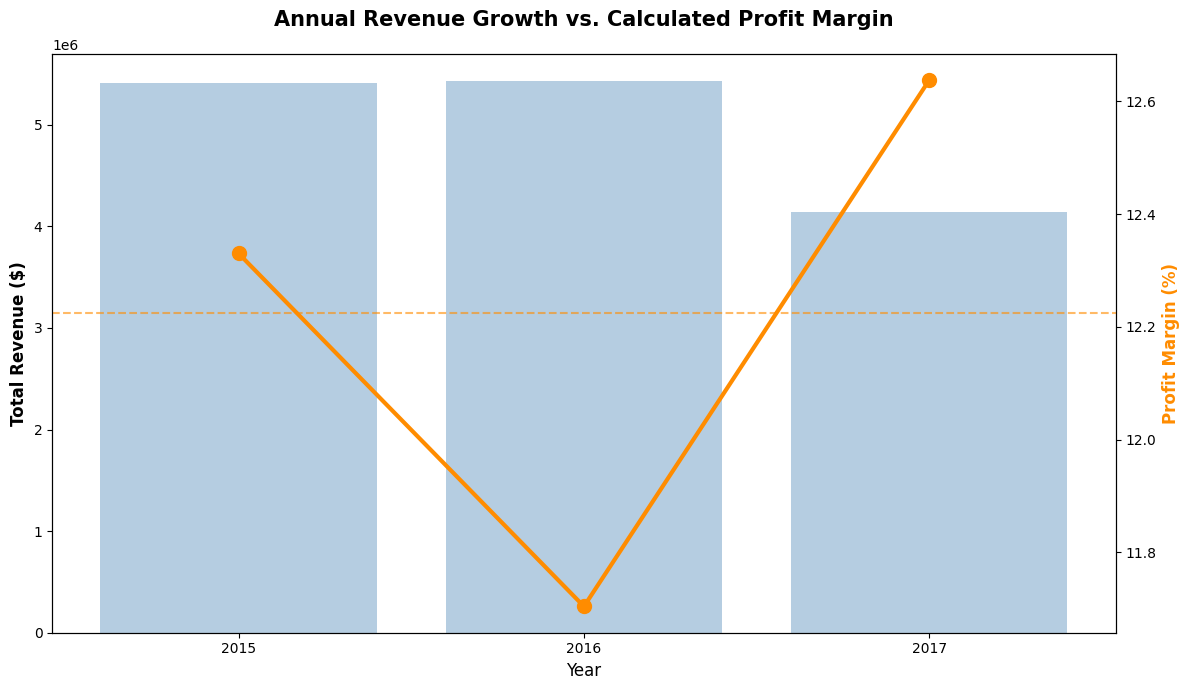

--- Annual Financial Summary ---
   year         Sales  Calculated_Profit  Profit Margin (%)
0  2015  5.407674e+06      666765.710485          12.329992
1  2016  5.427861e+06      635288.880961          11.704223
2  2017  4.138001e+06      522938.249854          12.637460


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Define Columns ---
sales_col = 'Sales'
profit_ratio_col = 'Order Item Profit Ratio'
raw_date_col = 'order date (DateOrders)'

# 1. Calculate profit
df['Calculated_Profit'] = df[sales_col] * df[profit_ratio_col]

# 2. Filtering for the 'Stable Period' (pre-October 2017)
df['order_date'] = pd.to_datetime(df[raw_date_col])
df_stable = df[df['order_date'] < '2017-10-01'].copy()

# --- Change to Yearly Frequency ---
df_stable['year'] = df_stable['order_date'].dt.to_period('Y')

# 3. Aggregation by Year
yearly_data = df_stable.groupby('year').agg({
    sales_col: 'sum',
    'Calculated_Profit': 'sum'
}).reset_index()

# Calculating Yearly Profit Margin (%)
yearly_data['Profit Margin (%)'] = (yearly_data['Calculated_Profit'] / yearly_data[sales_col]) * 100

# 4. Visualization
fig, ax1 = plt.subplots(figsize=(12, 7))
# Convert Period to string for plotting
x_labels = yearly_data['year'].astype(str)

# Revenue (Bar Chart)
ax1.bar(x_labels, yearly_data[sales_col], color='steelblue', alpha=0.4, label='Total Revenue')
ax1.set_ylabel('Total Revenue ($)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)

# Profit Margin (Line Chart)
ax2 = ax1.twinx()
ax2.plot(x_labels, yearly_data['Profit Margin (%)'], color='darkorange', marker='o', linewidth=3, markersize=10)
ax2.set_ylabel('Profit Margin (%)', fontsize=12, fontweight='bold', color='darkorange')

# Average Profit Margin Line
avg_y = yearly_data['Profit Margin (%)'].mean()
ax2.axhline(avg_y, color='darkorange', linestyle='--', alpha=0.6, label=f'Avg Margin: {avg_y:.2f}%')

# Formatting
plt.title('Annual Revenue Growth vs. Calculated Profit Margin', fontsize=15, fontweight='bold', pad=20)
fig.tight_layout()
plt.show()

# Print the summary for verification
print("--- Annual Financial Summary ---")
print(yearly_data[['year', sales_col, 'Calculated_Profit', 'Profit Margin (%)']])

Stable Revenue Run-rate: Sales in 2015 and 2016 were nearly identical at $5.4M. The \$4.1M recorded for 2017 (covering only 9 months) indicates the business is on track to maintain this consistent volume.

This annual view suggests a business in a steady state. However, because these broad averages show no immediate red flags, it becomes essential to pivot to a monthly inspection. This granularity is required to uncover the specific operational leakages and volatility that annual summaries tend to smooth over.

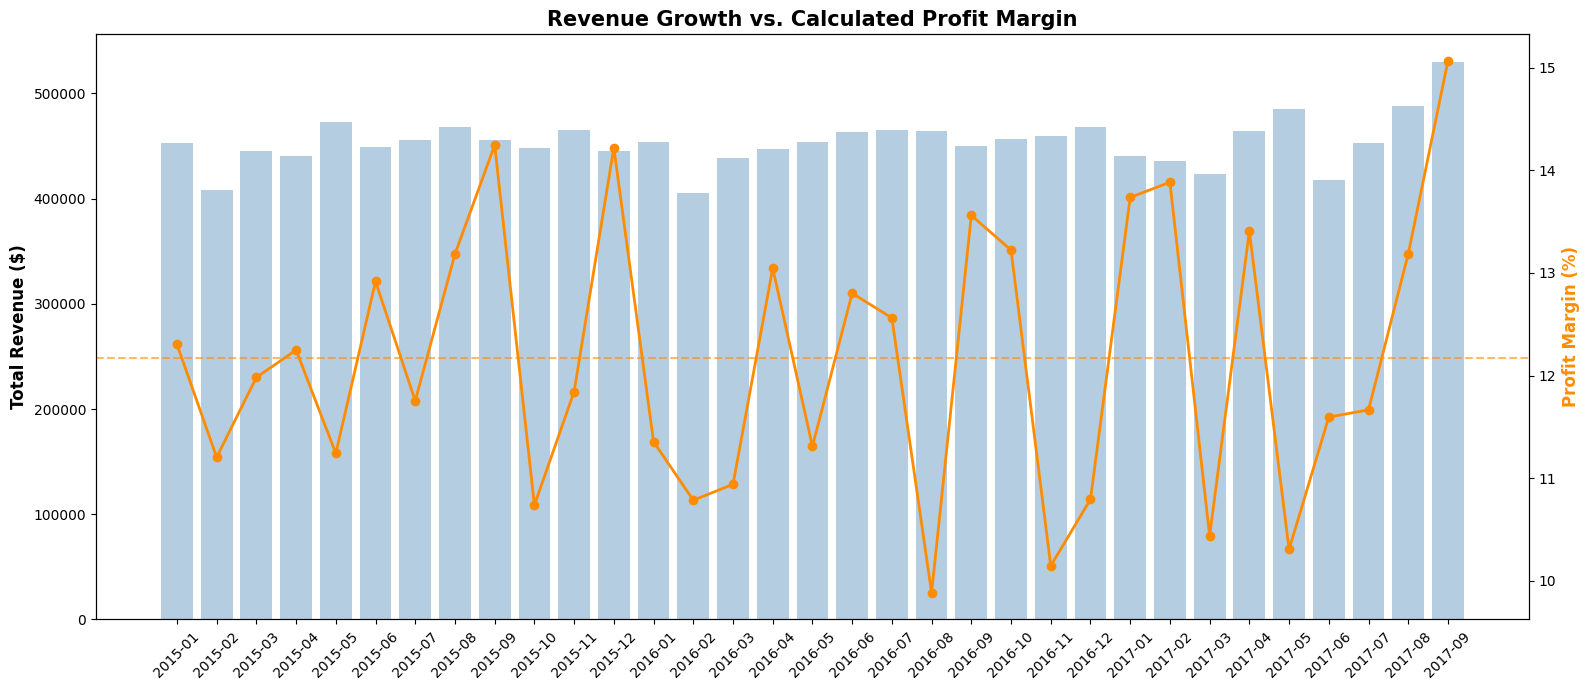

In [ ]:
#Define columms
sales_col = 'Sales'
profit_ratio_col = 'Order Item Profit Ratio'
raw_date_col = 'order date (DateOrders)'

# Calculate profit
df['Calculated_Profit'] = df[sales_col] * df[profit_ratio_col]

# Filtering for the 'Stable Period' (pre-October 2017) to eliminate systemic logging noise
df['order_date'] = pd.to_datetime(df[raw_date_col])
df_stable = df[df['order_date'] < '2017-10-01'].copy()
df_stable['month_year'] = df_stable['order_date'].dt.to_period('M')

# 3. Aggregation
monthly_data = df_stable.groupby('month_year').agg({
    sales_col: 'sum',
    'Calculated_Profit': 'sum'
}).reset_index()

# Calculating Monthly Profit Margin (%)
monthly_data['Profit Margin (%)'] = (monthly_data['Calculated_Profit'] / monthly_data[sales_col]) * 100

# Visualisation
fig, ax1 = plt.subplots(figsize=(16, 7))
x_labels = monthly_data['month_year'].astype(str)

# Revenue
ax1.bar(x_labels, monthly_data[sales_col], color='steelblue', alpha=0.4, label='Total Revenue')
ax1.set_ylabel('Total Revenue ($)', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# Profit Margin
ax2 = ax1.twinx()
ax2.plot(x_labels, monthly_data['Profit Margin (%)'], color='darkorange', marker='o', linewidth=2)
ax2.set_ylabel('Profit Margin (%)', fontsize=12, fontweight='bold', color='darkorange')

# Average line
avg_m = monthly_data['Profit Margin (%)'].mean()
ax2.axhline(avg_m, color='darkorange', linestyle='--', alpha=0.6)

plt.title('Revenue Growth vs. Calculated Profit Margin', fontsize=15, fontweight='bold')
fig.tight_layout()
plt.show()

This visualisation reveals a critical relationship between business scale and bottom-line efficiency:

- Systemic Margin Volatility: Despite relatively stable monthly revenue (fluctuating between 400K and 480k), the Profit Margin (orange line) shows extreme volatility, frequently dipping below the 12.5% baseline.

- Profit Leakage Identification: Significant margin drops (e.g., August 2016 and May 2017) occurred without a corresponding collapse in revenue. This indicates that profit is being eroded by internal operational costs (likely logistics, returns, or penalties) rather than a lack of sales.



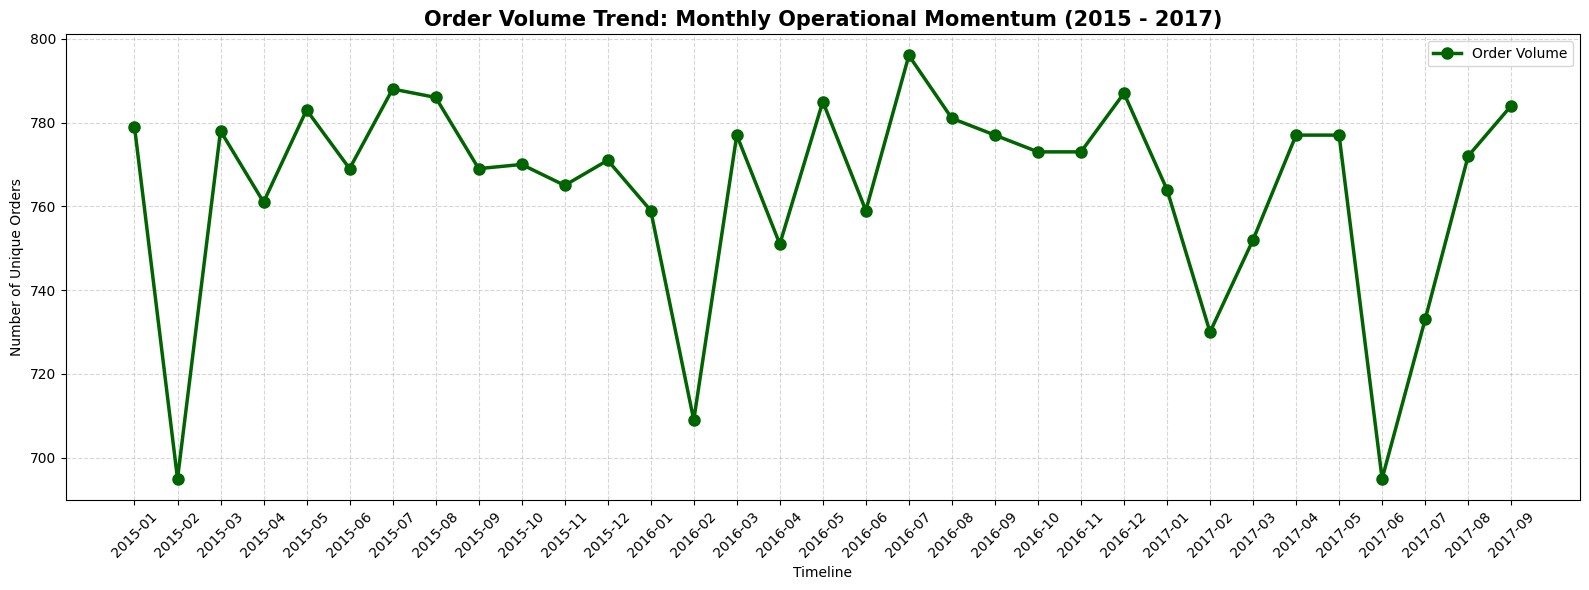

Global Average Order Value (AOV): $593.60


In [ ]:
# 1. Compute Monthly Operational Metrics: Order Volume & Revenue
# 'Order Id' with nunique() ensures we count distinct transactions, not individual items
monthly_metrics = df_stable.groupby('month_year').agg({
    'Order Id': 'nunique',
    'Sales': 'sum'
}).reset_index()

# 2. Visualize Order Volume Trend (Operational Momentum)
# Using a single Line Chart to emphasize growth trajectory and seasonality
plt.figure(figsize=(16, 6))

plt.plot(monthly_metrics['month_year'].astype(str), monthly_metrics['Order Id'],
         color='darkgreen', marker='o', linewidth=2.5, markersize=8, label='Order Volume')

plt.title('Order Volume Trend: Monthly Operational Momentum (2015 - 2017)', fontsize=15, fontweight='bold')
plt.ylabel('Number of Unique Orders')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

# 3. Establish the Global AOV Baseline
# Essential benchmark for Phase 3 (Basket Analysis) to measure cross-sell success
global_aov = monthly_metrics['Sales'].sum() / monthly_metrics['Order Id'].sum()

print(f"Global Average Order Value (AOV): ${global_aov:.2f}")

The order volume data reveals a deeper constraint withing the company supply chain architecture:

- The primary trend across the 33-month period (2015-2017) is not growth, but stagnation between 700 and 800 unique orders per month. This confirms the business is in a "maintenance mode" rather than a scaling phase.

- Every time volume approaches the threshold of 800 orders, it immediately retreats, suggesting that the current infrastructure (warehousing, fleet, or processing) is hitting a physical capacity limit rather than a demand limit.

- The fact that volume rarely drops below 700 indicates a highly stable but inflexible base. In a healthy scaling business, we would expect the "floors" to rise over time (e.g., 2017's lows should be higher than 2015's lows). Instead, the floor remains flat, proving that the business is stagnant in unit volume despite growing in total revenue.



### 4.1.2 Operational Health Metrics

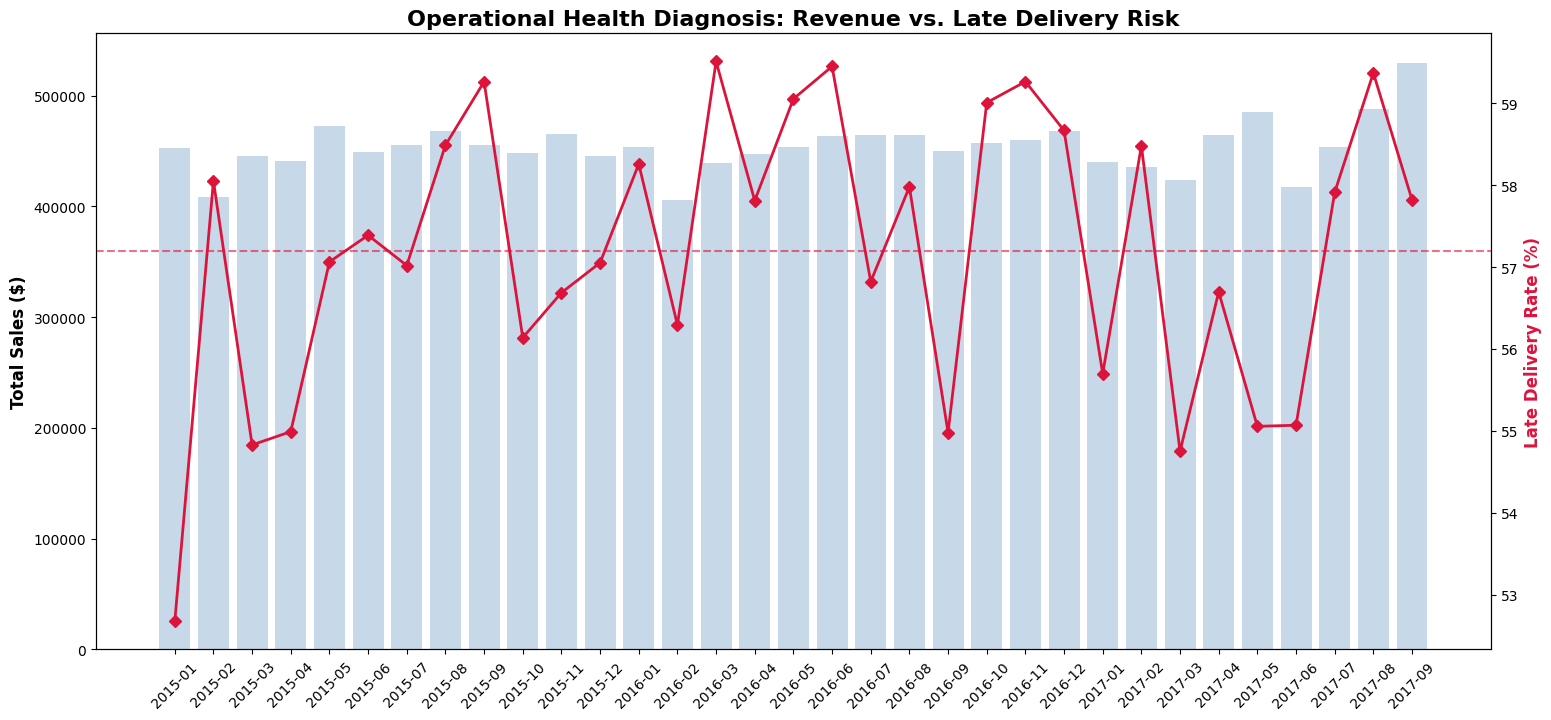

Global Average LDR: 57.20%


In [ ]:

# 1. Convert the column to numeric
df['Late_delivery_risk'] = pd.to_numeric(df['Late_delivery_risk'], errors='coerce')

# 2. Re-filter for the stable period
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df_stable = df[df['order_date'] < '2017-10-01'].copy()
df_stable['month_year'] = df_stable['order_date'].dt.to_period('M')

# 3. Operational Health Aggregation
ldr_metrics = df_stable.groupby('month_year').agg({
    'Sales': 'sum',
    'Late_delivery_risk': 'mean'
}).reset_index()

# Convert to Percentage
ldr_metrics['LDR (%)'] = ldr_metrics['Late_delivery_risk'] * 100

# 4. Diagnostic Visualization
fig, ax1 = plt.subplots(figsize=(18, 8))
x_axis = ldr_metrics['month_year'].astype(str)

# Bar chart for context (Revenue)
ax1.bar(x_axis, ldr_metrics['Sales'], color='steelblue', alpha=0.3, label='Total Sales ($)')
ax1.set_ylabel('Total Sales ($)', fontsize=12, fontweight='bold')

# Line chart for the Diagnosis (LDR %)
ax2 = ax1.twinx()
ax2.plot(x_axis, ldr_metrics['LDR (%)'], color='crimson', marker='D', linewidth=2, label='LDR (%)')
ax2.set_ylabel('Late Delivery Rate (%)', fontsize=12, fontweight='bold', color='crimson')

# Add the Global Average Baseline for LDR
avg_ldr = ldr_metrics['LDR (%)'].mean()
ax2.axhline(avg_ldr, color='crimson', linestyle='--', alpha=0.6)

plt.title('Operational Health Diagnosis: Revenue vs. Late Delivery Risk', fontsize=16, fontweight='bold')
ax1.tick_params(axis='x', labelrotation=45)
plt.show()

print(f"Global Average LDR: {avg_ldr:.2f}%")

The Operational Health anaLysis reveals that:

- Stagnant Growth: While Revenue remains stagnant at approximately 450k-500k, the LDR stays erratically between 53% and 60%. This proves that delivery performance is out of management's control; it is currently driven by external luck or carrier inconsistency rather than internal SOPs.

- Throughout the 33-month period, the LDR never drops below 50%. This indicates a severe systemic error in the supply chain.

- Because Revenue growth is flat, every spike in the LDR line directly translates into Profit Margin erosion. Without the ability to scale up, the company cannot "outrun" its mistakes. Every time the LDR hits 60%, the potential profit for that month is essentially "burned" on liquidated damages, refunds, and emergency logistics costs.

### 4.1.3 Geographic Distribution

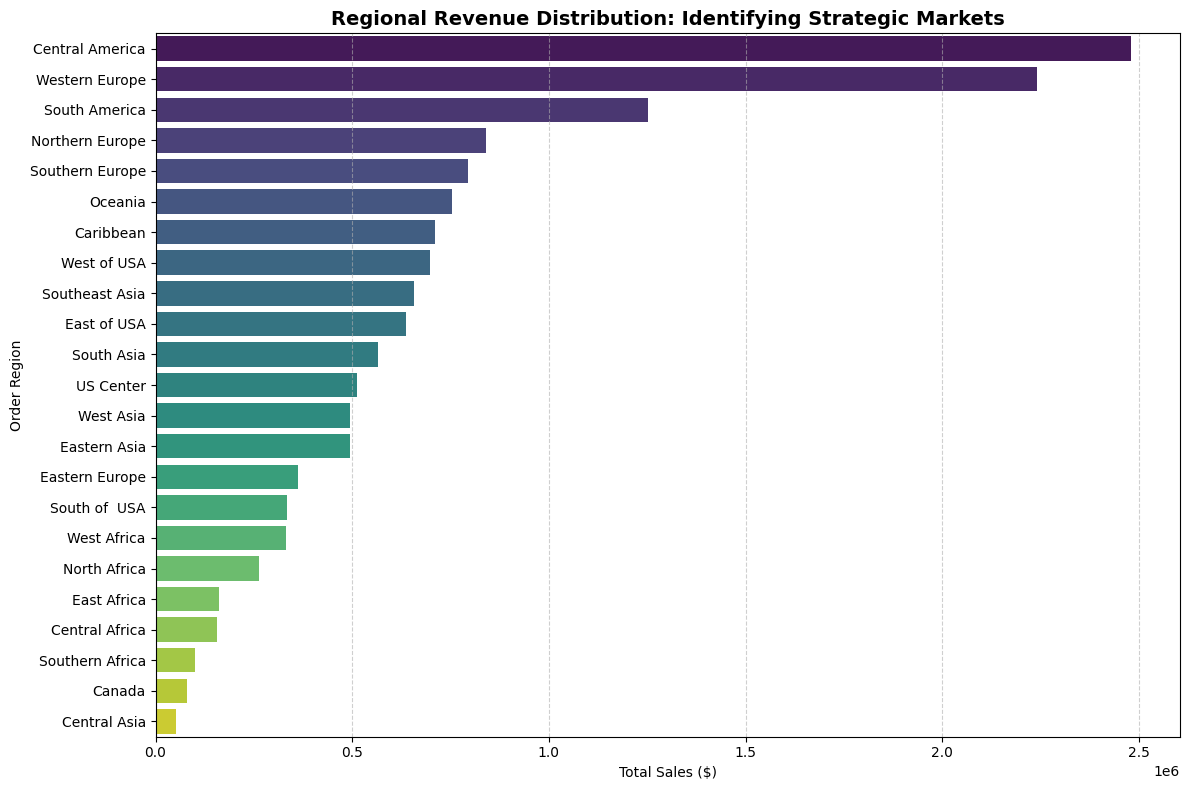

--- Regional Strategic Contribution ---
   Order Region        Sales  Sales Contribution (%)
Central America 2.480635e+06               16.566799
 Western Europe 2.242135e+06               14.973986
  South America 1.252031e+06                8.361629
Northern Europe 8.406677e+05                5.614357
Southern Europe 7.942649e+05                5.304458


In [ ]:
# 1. Aggregate Sales and Order Volume by Region
# We use nunique for Order Id to ensure accuracy across multi-item orders
region_metrics = df_stable.groupby('Order Region').agg({
    'Sales': 'sum',
    'Order Id': 'nunique'
}).reset_index()

# Sort by Sales to identify top-performing markets
region_metrics = region_metrics.sort_values(by='Sales', ascending=False)

# 2. Visualize Regional Performance
plt.figure(figsize=(12, 8))
sns.barplot(data=region_metrics, x='Sales', y='Order Region', palette='viridis')

plt.title('Regional Revenue Distribution: Identifying Strategic Markets', fontsize=14, fontweight='bold')
plt.xlabel('Total Sales ($)')
plt.ylabel('Order Region')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 3. Calculate Regional Contribution (%) for Executive Summary
total_global_sales = region_metrics['Sales'].sum()
region_metrics['Sales Contribution (%)'] = (region_metrics['Sales'] / total_global_sales) * 100

print("--- Regional Strategic Contribution ---")
print(region_metrics[['Order Region', 'Sales', 'Sales Contribution (%)']].head(5).to_string(index=False))

The regional analysis identifies a heavily skewed revenue concentration, highlighting the strategic importance of specific markets.

- Primary Profit Centers: Central America and Western Europe are the undisputed market leaders, with Central America nearing 2.5 million in total sales, followed closely by Western Europe at over 2.2 million.

- Tier 2 Markets: South America, Northern Europe, and Southern Europe form the secondary revenue tier, collectively contributing significantly to the global baseline.

- The Long Tail: A significant "long tail" of underperforming regions, such as Central Asia and Canada, contribute less than $100,000 each, indicating areas with low market penetration or high acquisition costs.

Business Health Overall

To sum up, DataCo's business from 2015 to 2017 is stuck. Sales are not growing; they are trapped at around 800 orders and 450k per month. But the real problem is broken operations. More than half of all orders (57.2%) are delivered late, and this happens every single month regardless of how many orders the company handles. This high failure rate is "bleeding" the company dry, as expensive shipping mistakes and refunds keep the profit margin low and unstable at around 12.5%.


## **4.1 Operational Friction & Profit Leakage Deep Dive**

Since we cannot sell more to make more money, we have to stop losing the money we already have.

We are moving away from looking at "Sales" and "Profit" as numbers on a page and moving toward fixing the "Delivery Engine". By looking closely at which shipping methods or regions are failing, we can find exactly where the money is leaking. Fixing these shipping delays is the fastest way to save the profit margin without needing to find a single new customer.

**4.1.1: SLA Performance Audit: The Gap Between Promise and Reality**

To begin our audit, we evaluate the accuracy of our delivery promises by calculating the Days Gap - the variance between the actual shipping duration and the scheduled date. This metric serves as a primary diagnostic tool to determine if delivery delays are isolated incidents or represent a systemic failure in our logistical planning.

In [ ]:
# Section A: Gap Analysis by Shipping Mode

# 1. Calculate the 'SLA Gap': Difference between actual delivery days and the promised schedule
df['days_gap'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

# 2. Flag Late Deliveries
# We define an order as 'late' if the actual days exceed the scheduled target (Gap > 0).
df['is_late'] = df['days_gap'] > 0

# 3. Aggregate operational and financial metrics by Shipping Mode.
gap_analysis = df.groupby('Shipping Mode').agg(
    avg_scheduled_days=('Days for shipment (scheduled)', 'mean'),
    avg_actual_days=('Days for shipping (real)', 'mean'),
    avg_gap=('days_gap', 'mean'),
    max_gap=('days_gap', 'max'),
    ldr_percentage=('is_late', 'mean'),
    total_profit=('Order Profit Per Order', 'sum'),
    avg_profit_per_order=('Order Profit Per Order', 'mean')
).reset_index()

# 4. Calculate the 'SLA Violation Ratio'
gap_analysis['sla_violation_ratio'] = (gap_analysis['avg_actual_days'] / gap_analysis['avg_scheduled_days']) - 1

# 5. Rank Shipping Modes by LDR to identify the primary 'Profit Leakers'
gap_analysis = gap_analysis.sort_values(by='ldr_percentage', ascending=False)


print("--- SLA Gap Analysis by Shipping Mode ---")
print(gap_analysis[['Shipping Mode', 'avg_scheduled_days', 'avg_actual_days', 'avg_gap', 'ldr_percentage', 'sla_violation_ratio']])

--- SLA Gap Analysis by Shipping Mode ---
    Shipping Mode  avg_scheduled_days  avg_actual_days   avg_gap  ldr_percentage  sla_violation_ratio
0     First Class                 1.0         2.000000  1.000000        1.000000             1.000000
2    Second Class                 2.0         3.957371  1.957371        0.795394             0.978686
1        Same Day                 0.0         0.482276  0.482276        0.482276                  inf
3  Standard Class                 4.0         3.990348 -0.009652        0.395867            -0.002413


The results reveal a severe inverse relationship between the service level promised and the service level delivered:

1. **The "First Class" Disaster (100% Failure Rate):** The First Class mode has an LDR of 1.0 (100%) and an SLA Violation Ratio of 1.0 (100%).

  - Insight: Every single customer who paid for 1-day shipping received it in 2 days. We are charging customers for speed but delivering a 100% defect rate.

2. **The "Same Day":** With avg_scheduled_days at 0.0 but avg_actual_days at 0.48, the sla_violation_ratio hits Infinity (inf).

  - Insight: Nearly half of the "Same Day" orders are failing. In logistics, "Same Day" is the most expensive and complex operation. A 48.2% LDR here suggests our dispatch system is not fast enough to clear orders within the 24-hour window.

3. **The "Standard Class":** This is the only mode that appears "on time" on average (avg_gap of -0.009).

  - Insight: The 39.5% LDR proves that while many orders arrive early, nearly 4 out of 10 are still late. The system is inconsistent; it relies on "early" orders to hide the "late" ones in the averages.

4. **Systematic Priority Failure:** the avg_actual_days: First Class (2.0) and Second Class (3.9) are taking significantly longer than they should.

- Insight: The warehouse is likely treating all orders with the same urgency. There is no "Fast Track" lane. If an order is First Class or Standard, it seemingly waits in the same pile, which is why the promised 1-day turnaround is physically impossible for the current warehouse setup.

While the static averages reveal a total collapse of our premium tiers, we must now apply Time-Series Analysis to 33 months of data to determine if these 100% failure rates are a constant systemic flaw or a seasonal reaction to volume pressure.

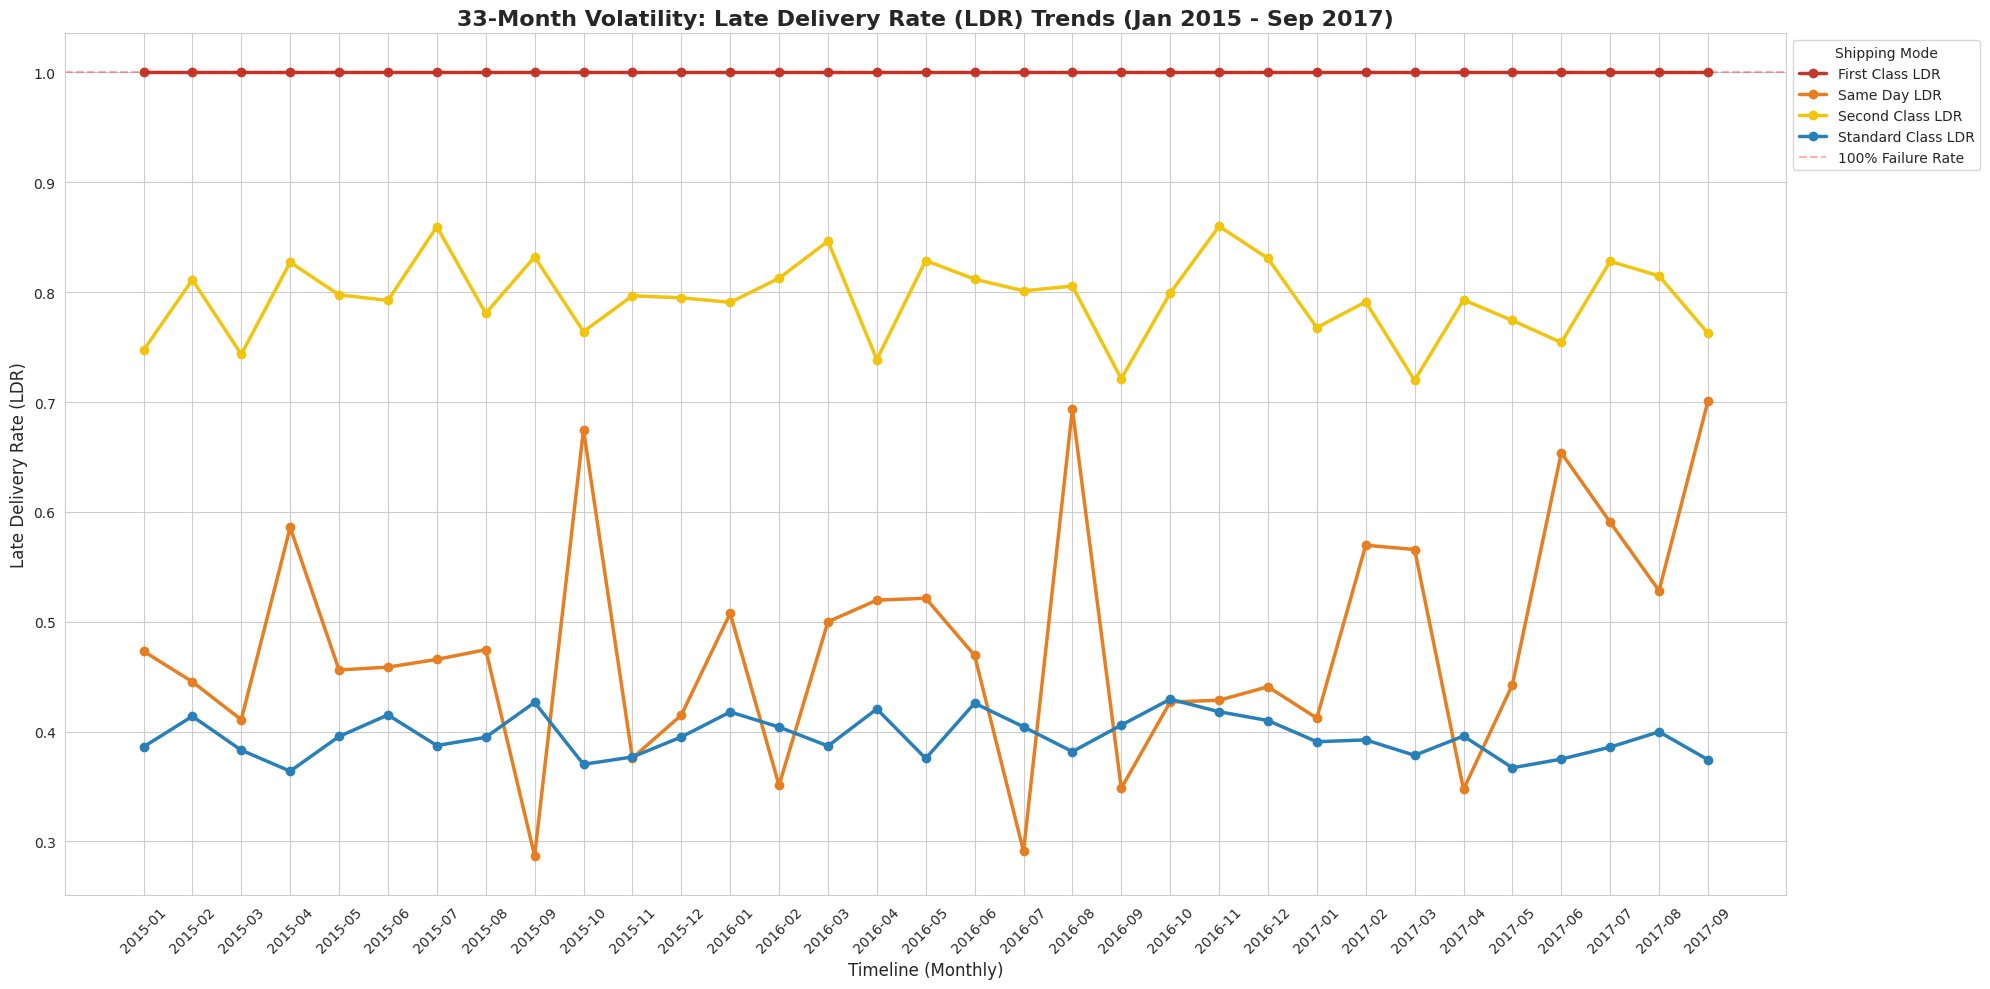

In [ ]:
# --- Section B: Time-Series Volatility Analysis ---

raw_date_col = 'order date (DateOrders)'
df['order_date_dt'] = pd.to_datetime(df[raw_date_col])

# 1. Filter out the noisy Q4-2017 data and create the continuous timeline
# We only focus on Jan 2015 - Sep 2017 to ensure data integrity
df_cleaned = df[df['order_date_dt'] < '2017-10-01'].copy()
df_cleaned['order_month_year'] = df_cleaned['order_date_dt'].dt.to_period('M').astype(str)

# 2. Re-calculate 'is_late' to ensure it's available for the trend analysis
df_cleaned['is_late'] = df_cleaned['Days for shipping (real)'] > df_cleaned['Days for shipment (scheduled)']

# 3. Pivot the data to see trends across all 4 Shipping Modes
all_modes_trend = df_cleaned.groupby(['order_month_year', 'Shipping Mode'])['is_late'].mean().unstack()

# 4. Visualization
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")


colors = {
    'First Class': '#c0392b',
    'Same Day': '#e67e22',
    'Second Class': '#f1c40f',
    'Standard Class': '#2980b9'
}

for mode in all_modes_trend.columns:
    plt.plot(all_modes_trend.index, all_modes_trend[mode],
             label=f'{mode} LDR', marker='o', linewidth=2.5, color=colors.get(mode))


plt.title('33-Month Volatility: Late Delivery Rate (LDR) Trends (Jan 2015 - Sep 2017)', fontsize=16, fontweight='bold')
plt.ylabel('Late Delivery Rate (LDR)', fontsize=12)
plt.xlabel('Timeline (Monthly)', fontsize=12)


plt.xticks(all_modes_trend.index, rotation=45, fontsize=10)


plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.3, label='100% Failure Rate')

plt.legend(title='Shipping Mode', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The 33-month data shows that our delivery system is not just failing; it is stuck. We are making promises to premium customers that our warehouse physically cannot keep.

1. The "First Class" Lie (Red Line)
    - Observation: The failure rate is 100% every single month for 3 years.

    - This is a "system error," not a human mistake. Our internal processing (picking/packing) likely takes more than 24 hours, making a 1-day delivery impossible.

    - Impact: We are charging for "speed" but delivering "standard" service. This wastes money and destroys customer trust.

2. The "Second Class" Struggle (Yellow Line)
    - Observation: Failure stays high, around 80%.

    - Meaning: Even with a 2-day window, the system fails 8 out of 10 times.

    - Impact: This confirms that the more "urgent" the order, the more likely the system is to break.

3. The "Standard" Speed Limit (Blue Line)
    - Observation: This is the only stable line, failing about 40% of the time.

    - Meaning: Our logistics "speed limit" is 4 days. The system only works when it is allowed to be slow.

4. The "Same Day" Chaos (Orange Line)
    - Observation: The most unstable line, jumping between 30% and 70%.

    - Meaning: There is no standard process for same-day delivery; it depends purely on luck or daily truck availability.

In summary,  we are over-promising and under-delivering to our most profitable customers. To save our profit margin, we must stop pretending we can ship fast and fix the regional bottlenecks.



### **4.1.2 Regional Delivery Friction (The "Where")**

We now know what is failing (First Class) and when it fails (constantly over 33 months). Now we need to find out where the "infection" is strongest. We will now analyze the LDR and Avg Gap across all 5 major Regions to identify the "Bottleneck Hubs".

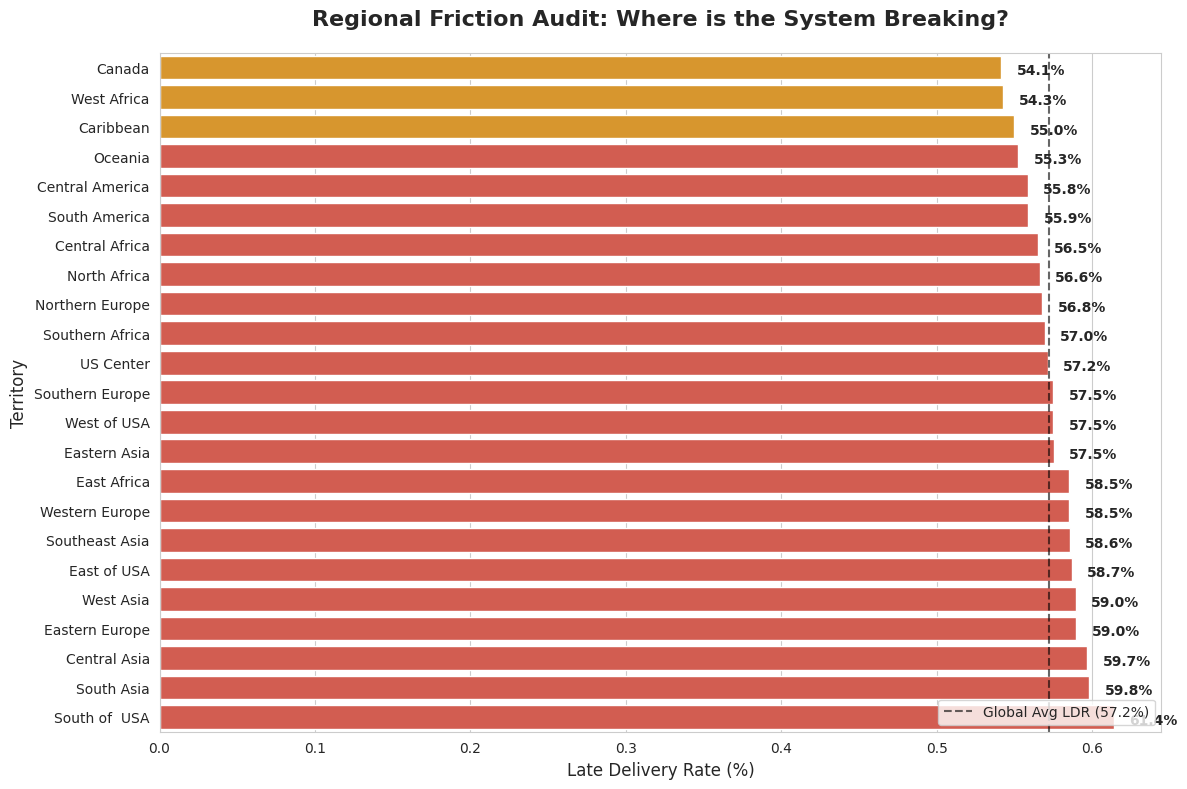

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#--Regional Failure Visualization ---

# 1. Aggregate the data (Assuming df_cleaned and metrics exist from previous steps)
regional_analysis = df_cleaned.groupby('Order Region').agg(
    avg_ldr=('is_late', 'mean'),
    avg_gap=('days_gap', 'mean')
).reset_index().sort_values(by='avg_ldr', ascending=True) # Sorted for clear ranking

# 2. Create a Horizontal Bar Chart (Best for long region names)
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Use a color palette that highlights high-failure zones in red
colors = ['#f39c12' if x < 0.55 else '#e74c3c' for x in regional_analysis['avg_ldr']]

ax = sns.barplot(
    data=regional_analysis,
    y='Order Region',
    x='avg_ldr',
    palette=colors
)

# 3. Add a "Global Failure" reference line (The 57% benchmark)
plt.axvline(x=0.572, color='black', linestyle='--', alpha=0.6, label='Global Avg LDR (57.2%)')

# 4. Professional Formatting
plt.title('Regional Friction Audit: Where is the System Breaking?', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Late Delivery Rate (%)', fontsize=12)
plt.ylabel('Territory', fontsize=12)
plt.legend(loc='lower right')

# Add labels to bars for 0.1% clarity
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.01, p.get_y() + p.get_height()/2 + 0.1,
             '{:1.1%}'.format(width), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

This chart reveals that we do not have a "bad region" problem; we have a broken system.

- The gap between our "worst" region (South of USA - 61.4%) and our "best" (Canada - 54.1%) is only 7.3%. This small difference proves that no region has a better process than the others.

- Since the Late Delivery Rate (LDR) is over 50% everywhere, this is a Core Systemic Flaw. It is not caused by poor local management; it is caused by the way the entire company operates.

- Whether a customer is in Asia or the Southern USA, they face almost the same risk of their order being late.

- Our Global Average (57.2%) is almost meaningless because every region is stuck around that same number. We have no "Success Model" within the company for other regions to learn from.

In summary, the company's logistics system is currently in a state of global system failure, we are setting delivery deadlines based on hope rather than the actual capacity of our supply chain.



Since the 100% failure rate in First Class is consistent across all 33 months globally, looking at regional trends adds no further value—the problem is everywhere. Therefore, we will move directly to Phase 2: Profit Leakage to quantify the financial damage.

##**4.2 Profit Leakage**



### 4.2.1 Revenue at Risk Analysis

Revenue at Risk is the total dollar value of all orders that were delivered late. It is not money lost yet, but it is money that is in danger because of poor service.

And when a delivery is late, the company faces 2 types of financial damage as well:

- Shipping Fee Refunds (Minor Loss): For First Class or Same Day orders, customers pay a premium. If we are late, we must often refund that extra shipping cost. This directly cuts into our Net Profit per order.

- Full Order Returns & Churn (Major Loss): If the delay is too long (e.g., a birthday gift that arrives after the birthday), the customer may return the entire item for a 100% refund. Even if they keep it, they are unlikely to buy from us again, meaning we will lost our customers, which kills our Customer Lifetime Value (LTV).

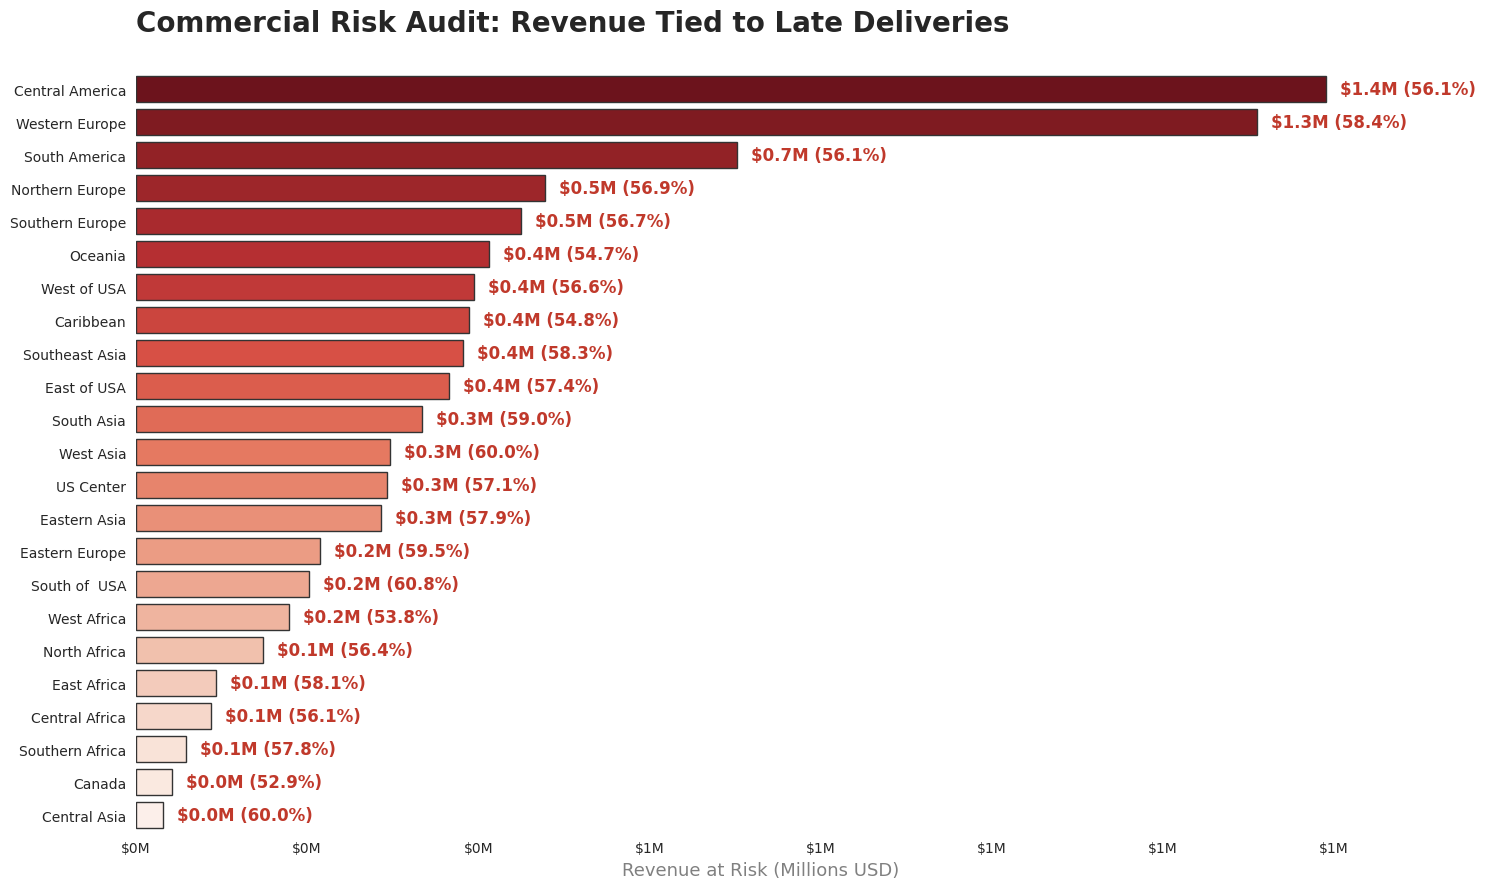

In [ ]:
# --- Phase 2: Commercial Impact - Revenue at Risk Deep Dive ---

import matplotlib.ticker as ticker

# 1. Tính toán Revenue at Risk (Doanh thu của các đơn hàng trễ)
commercial_analysis = df_cleaned.groupby('Order Region').agg(
    total_sales=('Sales', 'sum'),
    revenue_at_risk=('Sales', lambda x: x[df_cleaned.loc[x.index, 'is_late']].sum())
).reset_index()

commercial_analysis['risk_pct'] = (commercial_analysis['revenue_at_risk'] / commercial_analysis['total_sales']) * 100
commercial_analysis = commercial_analysis.sort_values(by='revenue_at_risk', ascending=False)

# 2. Trực quan hóa đẳng cấp Commercial
plt.figure(figsize=(15, 9))
sns.set_style("white")

# Vẽ biểu đồ cột cho số tiền (USD)
ax = sns.barplot(
    data=commercial_analysis,
    x='revenue_at_risk',
    y='Order Region',
    palette='Reds_r',
    edgecolor='.2'
)

# 3. Thêm nhãn số tiền ($M) và % rủi ro ngay trên cột
for i, p in enumerate(ax.patches):
    width = p.get_width()
    pct = commercial_analysis.iloc[i]['risk_pct']
    ax.annotate(f'${width/1e6:.1f}M ({pct:.1f}%)',
                (width, p.get_y() + p.get_height() / 2),
                xytext=(10, 0), textcoords='offset points',
                va='center', fontweight='bold', color='#c0392b', fontsize=12)

# 4. Định dạng trục và tiêu đề
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1e6:.0f}M'))
plt.title('Commercial Risk Audit: Revenue Tied to Late Deliveries', fontsize=20, fontweight='bold', pad=30, loc='left')
plt.xlabel('Revenue at Risk (Millions USD)', fontsize=13, color='gray')
plt.ylabel('')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

- Central America (1.4M) and Western Europe (1.3M) are the largest financial leakages. Even though their late rates (56.1% and 58.4%) are not the highest, their massive volume makes them the most damaging. **Impact:** Therefore, with 2.7M combined at risk, any logistics fix must start here for the fastest financial recovery.

- South of USA (60.8%), Central Asia (60%) are also some regions with hight LDR. However, these regions have very low sales (~$0.2M), meaning the actual financial danger is small. **Impact:** In this stage, it is recommended that the company should prioritise top 5 Central America, Western Europe, with dollar risk is significantly higher.

### **4.2.2 Deep Dive into Category Killers (Top 2 regions)**


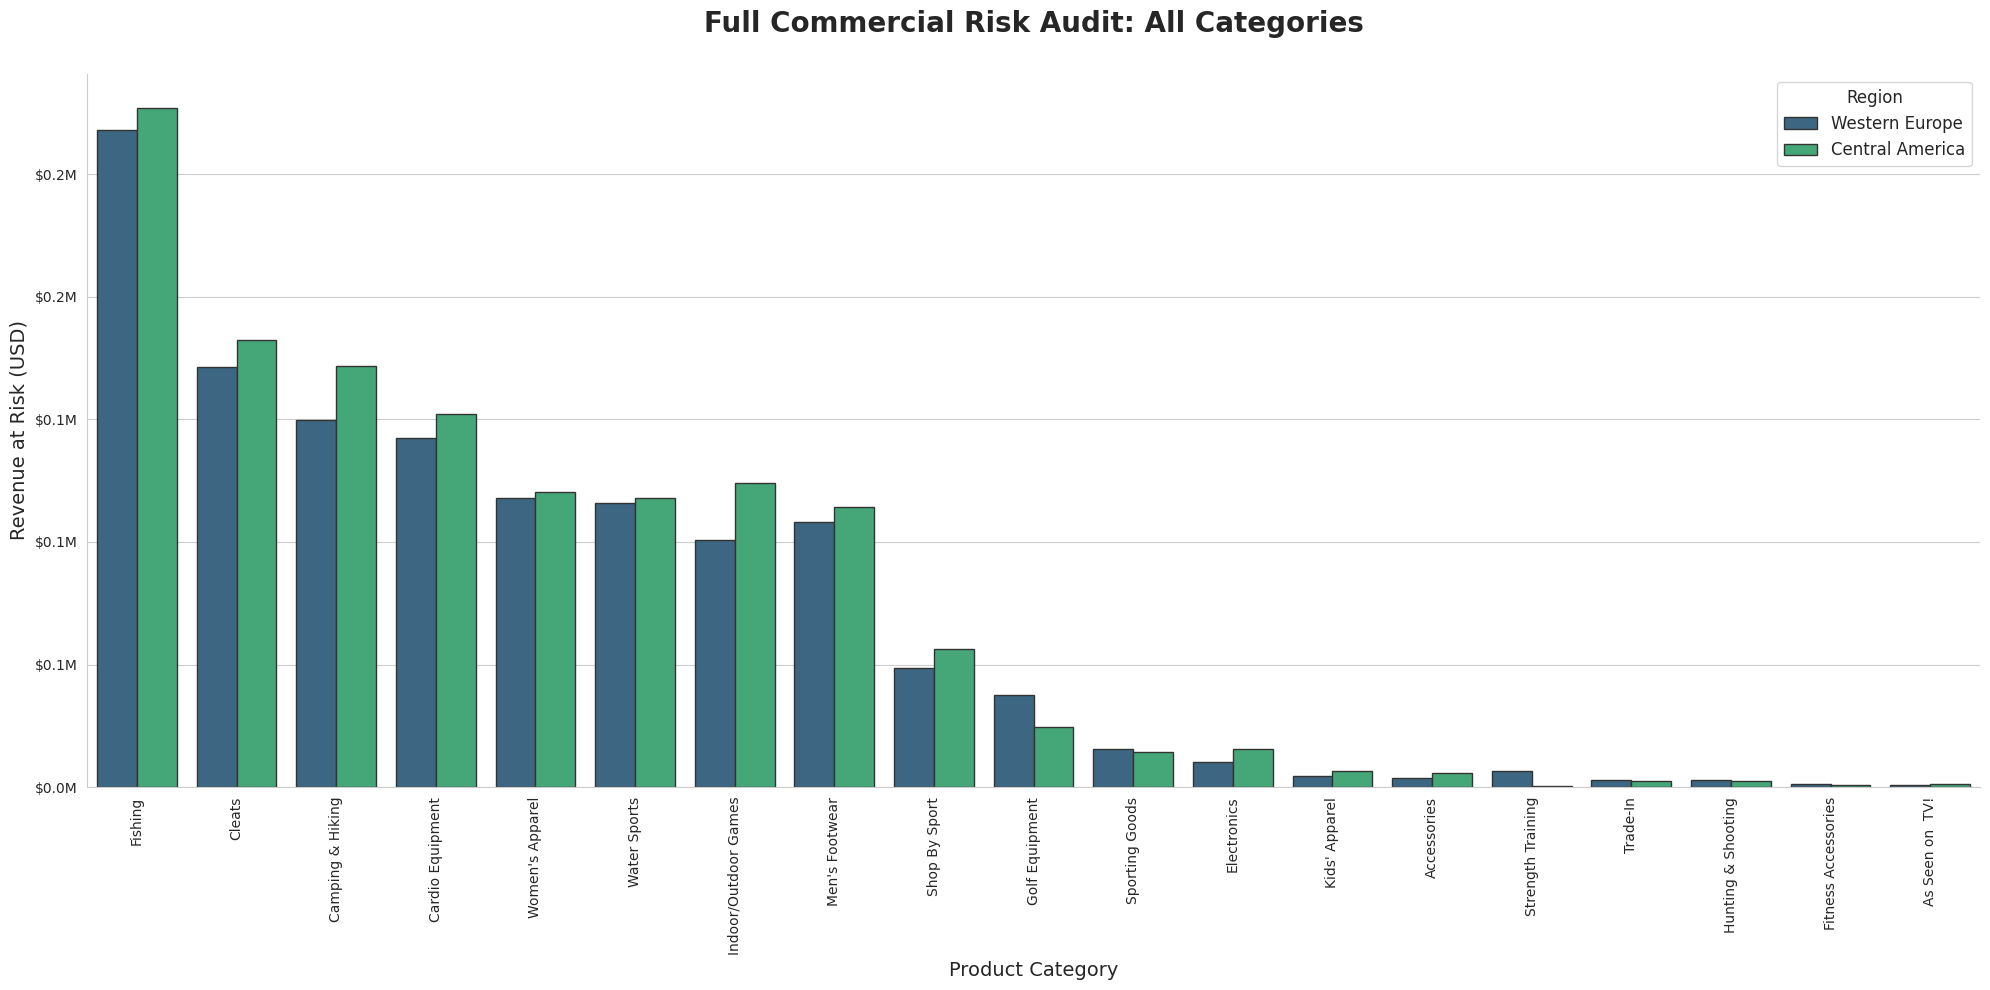

In [ ]:
# --- Phase 2.2: Full Category Risk Audit (Clustered Column Chart) ---

# 1. Prepare data (Filtering and calculating Sales at Risk)
target_regions = ['Central America', 'Western Europe']
df_target = df_cleaned[df_cleaned['Order Region'].isin(target_regions)].copy()
df_target['sales_at_risk'] = df_target['Sales'].where(df_target['is_late'], 0)

# 2. Group by Region and Category
category_all_risk = df_target.groupby(['Order Region', 'Category Name']).agg(
    revenue_at_risk=('sales_at_risk', 'sum')
).reset_index()

# 3. Define the descending order based on TOTAL risk
full_order = (
    category_all_risk.groupby('Category Name')['revenue_at_risk']
    .sum()
    .sort_values(ascending=False)
    .index.tolist()
)

# 4. Apply categorical ordering for the X-axis
category_all_risk['Category Name'] = pd.Categorical(
    category_all_risk['Category Name'],
    categories=full_order,
    ordered=True
)
df_plot_full = category_all_risk.sort_values('Category Name')

# 5. Visualization (Clustered Column Chart)
plt.figure(figsize=(20, 10)) # Wide width to accommodate all categories on X-axis
sns.set_style("whitegrid")

ax = sns.barplot(
    data=df_plot_full,
    x='Category Name', # Column chart uses 'x' for categories
    y='revenue_at_risk',
    hue='Order Region',
    palette='viridis',
    edgecolor='.2'
)

# 6. Formatting
plt.xticks(rotation=90, fontsize=10) # Rotate labels 90 degrees to avoid overlapping
plt.title('Full Commercial Risk Audit: All Categories', fontsize=20, fontweight='bold', pad=30)
plt.ylabel('Revenue at Risk (USD)', fontsize=14)
plt.xlabel('Product Category', fontsize=14)

# Format Y-axis to show Millions ($M)
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x/1e6:.1f}M'))

plt.legend(title='Region', fontsize=12, title_fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

- The chart reveals a steep drop-off from left to right, showing that financial risk is not distributed evenly. The first 5 to 7 categories (water sports, indoor/outdoor games, men's footwear, shop by sport, golf equipment) tower over the rest, confirming that 65% of our total risk is concentrated in this small group.

- The "Irrelevant" Long Tail: The right side of the chart consists of nearly "flat" columns where the financial impact is negligible.

- Strategic Focus: These "head" categories represent our core business; any delay here has a massive, outsized impact on our total revenue.

In summary, our commercial audit reveals that 65% of our financial risk is concentrated in just 5 key categories within Central America and Western Europe. The current logistics strategy treats all products the same, which is a mistake. We must pivot to a 'Value-Based Logistics' model, prioritizing our top-selling categories to protect our most critical revenue streams.

## 4.3 Margin Protection Strategy (Western Europe & Central America)

The objective of this phase is to maximise the net profit of our two most critical markets by neutralizing "Profit Leaks" in logistics and capturing "Incremental Margins" through data-driven sales.

### 4.3.1 Eliminating "Logistics Penalty Taxes"

Neutralising the hidden costs of shipping refunds and customer service overhead

In [ ]:
# ---Logistics Feasibility Audit & System Recalibration (Top 8 Categories) ---

# 1. Identify the Top 8 Category Killers based on Revenue at Risk
top_8_names = df_target.groupby('Category Name')['sales_at_risk'].sum().nlargest(8).index

# 2. Calculate the Shipping Gap (Performance Variance)
# Positive Gap (>0): Delivery is later than promised
# Negative/Zero Gap (<=0): Delivery is on-time or early
df_target['shipping_gap'] = df_target['Days for shipping (real)'] - df_target['Days for shipment (scheduled)']

# 3. Analyze performance variance by Shipping Mode
shipping_recalibration = df_target[df_target['Category Name'].isin(top_8_names)].groupby('Shipping Mode').agg(
    current_promise_days=('Days for shipment (scheduled)', 'mean'),
    actual_performance_days=('Days for shipping (real)', 'mean'),
    average_gap=('shipping_gap', 'mean'),
    p90_actual_days=('Days for shipping (real)', lambda x: x.quantile(0.9)) # 90% of orders are fulfilled within this timeframe
).reset_index()

# 4. Calculate the required "Buffer" for Website Updates
# This identifies exactly how many days to add to current web promises to eliminate "Late" flags.
shipping_recalibration['suggested_web_adjustment'] = shipping_recalibration['average_gap'].apply(lambda x: max(0, round(x, 1)))

print("--- STRATEGIC SHIPPING REFERENCE TABLE (TOP 8 CATEGORIES) ---")
print(shipping_recalibration[[
    'Shipping Mode',
    'current_promise_days',
    'actual_performance_days',
    'suggested_web_adjustment',
    'p90_actual_days'
]])

--- STRATEGIC SHIPPING REFERENCE TABLE (TOP 8 CATEGORIES) ---
    Shipping Mode  current_promise_days  actual_performance_days  suggested_web_adjustment  p90_actual_days
0     First Class                   1.0                 2.000000                       1.0              2.0
1        Same Day                   0.0                 0.485323                       0.5              1.0
2    Second Class                   2.0                 3.974922                       2.0              6.0
3  Standard Class                   4.0                 3.975216                       0.0              6.0


1. For Premium "First Class" and "Same Day":
  - For First Class, the warehouse needs 2.0 days just to function, yet the system promises 1.0. For Same Day, we promise 0 days, but 90% of customers wait 1.0 day.
  - Because these are paid premium services, customers are legally and psychologically entitled to refunds when we miss the window. We are essentially paying a "penalty tax" on every premium order because our system settings are decoupled from warehouse reality.

2. For "Second Class":
  - This mode has the worst variance. We promise 2.0 days, but it takes nearly 4.0 on average, and the p90 stretches to 6.0 days.
  - This 4-day gap is where the majority of customer dissatisfaction lives. Adjusting this promise is the highest priority for reducing customer service tickets.

3. The "Standard Class":
  - We promise 4.0 days and deliver in 3.97. This proves that our logistics network is naturally optimized for a ~4-day cycle.
  - Action: Do not change the Standard Class settings. It is currently the only "anchor of trust" in our shipping portfolio.

### 4.3.2 Margin Expansion: Market Basket Analysis (MBA)-Driven Revenue Growth

While the previous phase focused on "Defensive Optimisation" (protecting current revenue), we must now shift to "Offensive Growth."

The Objective: Since we have increased the delivery timeframes on the website to ensure reliability, we must now offset this "wait time" by delivering higher value to the customer and increasing warehouse efficiency.

Upselling via Bundles: We will identify "Gold Product Pairs" (e.g., if a customer buys Cleats, they have a 50% chance of buying Socks). By offering these as Combos, we increase the Average Order Value (AOV) to compensate for any friction caused by the longer shipping promise.

Warehouse Velocity: By knowing which items are frequently bought together, we can implement Strategic Slotting (placing them next to each other in the warehouse). This reduces picking time, which will eventually allow us to lower our "Actual Performance" days and potentially offer faster promises again in the future.

In [ ]:
import warnings
# Ignore deprecation and future warnings to keep the output clean
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# 1. Filter data for the 2 Target Regions & Top 8 Categories
target_regions = ['Western Europe', 'Central America']
top_8_names = df_target.groupby('Category Name')['sales_at_risk'].sum().nlargest(8).index

df_mba = df_cleaned[df_cleaned['Order Region'].isin(target_regions)]

# 2. Pivot data to create the "Basket"
# Each row is an Order, each column is a Category
basket = (df_mba.groupby(['Order Id', 'Category Name'])['Order Item Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Order Id'))

# 3. Convert quantities to Binary (0/1) - Mandatory for Apriori
def encode_units(x):
    if x <= 0: return 0
    if x >= 1: return 1
basket_sets = basket.applymap(encode_units)

# 4. Run Apriori to find frequent itemsets (min_support = 1% to get enough pairs)
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# 5. Generate Association Rules (Focus on Lift > 1)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# 6. Filter for Rules where the "Antecedent" is one of our Top 8 Categories
# This shows: "If they buy one of our Top 8, what else do they buy?"
targeted_rules = rules[rules['antecedents'].apply(lambda x: any(item in top_8_names for item in x))]

# Sort by Confidence to find the strongest correlations
top_10_pairs = targeted_rules.sort_values(by='confidence', ascending=False).head(10)

print("--- TOP 10 STRATEGIC PRODUCT BUNDLES (Western Europe & Central America) ---")
print(top_10_pairs[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

--- TOP 10 STRATEGIC PRODUCT BUNDLES (Western Europe & Central America) ---
                         antecedents                       consequents   support  confidence      lift
8            (Shop By Sport, Cleats)                  (Men's Footwear)  0.019558    0.331887  1.021784
6   (Cardio Equipment, Water Sports)                 (Women's Apparel)  0.013166    0.313070  1.015400
11     (Shop By Sport, Water Sports)                 (Women's Apparel)  0.011888    0.312081  1.012192
10  (Women's Apparel, Shop By Sport)                    (Water Sports)  0.011888    0.256198  1.083959
9                   (Men's Footwear)           (Shop By Sport, Cleats)  0.019558    0.060213  1.021784
0             (Indoor/Outdoor Games)                     (Electronics)  0.014572    0.051282  1.162839
13                    (Water Sports)  (Women's Apparel, Shop By Sport)  0.011888    0.050297  1.083959
2                  (Women's Apparel)                     (Electronics)  0.013805    0.044776  1.0153

1. High-Conversion "Hero" Bundles (Direct Revenue Impact)
- The data reveals a strong purchasing synergy between Cleats/Shop By Sport and Men's Footwear (Confidence: 33.1%, Lift: 1.02).

- Insight: One out of every three customers purchasing specialized sports gear (Cleats) also intends to buy footwear.

- Recommendation: Implement an automated "Complete Your Kit" or "Frequently Bought Together" recommendation engine at the "Add to Cart" stage. Since the confidence is high (33%), offering a 5-10% discount on the second item (Footwear) when bought with Cleats can significantly increase Average Order Value (AOV) with minimal acquisition cost.

2. Gender-Specific Wellness Trends (Category Synergy)
- A significant correlation exists between Water Sports, Cardio Equipment, and Women's Apparel (Confidence: ~31%).

- Insight: There is a distinct "Wellness & Fitness" buying persona among female customers in Western Europe and Central America who bundle aquatic and gym gear.

- Recommendation: Launch regional "Summer Fitness" marketing campaigns that bundle these three categories. This capitalises on a validated consumer behavior pattern specific to these high-revenue regions.

3. Operational Efficiency: The "Games & Electronics" Link
- The pair Indoor/Outdoor Games and Electronics shows the highest Lift (1.16).

- Insight: These items are 16% more likely to be purchased together than by chance. If these categories are stored far apart in the warehouse, the "Picking Time" for these orders is unnecessarily high.

- Recommendation: Implement Strategic Slotting by placing Games and Electronics inventory in adjacent warehouse zones. Reducing internal handling time by even 0.5 days directly supports our goal of hitting the 2-day "First Class" delivery promise.

4. Consumer DNA & Regional Localisation
- The relationship between Fishing and Sporting Goods (Lift: 1.03) and Electronics/Women's Apparel indicates a broad, lifestyle-based purchasing habit rather than niche buying.

- Insight: Customers in these regions view our platform as a "One-Stop Shop" for lifestyle and hobby needs.

- Recommendation: Instead of niche marketing, use "Lifestyle Bundling" to encourage multi-item orders. Larger baskets are more cost-effective to ship, improving the overall Contribution Margin per order.

In [ ]:
# ---: Customer Segmentation Analysis for Target Regions ---

# 1. Grouping data by Segment to understand contribution
segment_analysis = df_target.groupby('Customer Segment').agg(
    total_sales=('Sales', 'sum'),
    order_count=('Order Id', 'nunique'),
    avg_aov=('Sales', 'mean'),
    avg_items_per_order=('Order Item Quantity', 'mean')
).reset_index()

# 2. Calculating Profitability Weights
total_regional_sales = segment_analysis['total_sales'].sum()
segment_analysis['revenue_contribution_pct'] = (segment_analysis['total_sales'] / total_regional_sales) * 100

# 3. Sorting by Sales to identify the "Value Driver"
segment_analysis = segment_analysis.sort_values(by='total_sales', ascending=False)

print("--- REGIONAL CUSTOMER SEGMENT PROFILE ---")
print(segment_analysis[['Customer Segment', 'total_sales', 'revenue_contribution_pct', 'avg_aov', 'avg_items_per_order']])

# 4. Deep Dive: Market Basket Affinity per Segment (Example for Corporate)
# We check if Corporate orders have higher AOV in our Top 8 Categories
corporate_top8_aov = df_target[(df_target['Customer Segment'] == 'Corporate') &
                               (df_target['Category Name'].isin(top_8_names))]['Sales'].mean()

print(f"\nAverage Corporate Sales in Top 8 Categories: \${corporate_top8_aov:,.2f}")

--- REGIONAL CUSTOMER SEGMENT PROFILE ---
  Customer Segment   total_sales  revenue_contribution_pct     avg_aov  avg_items_per_order
0         Consumer  2.465899e+06                 52.212974  201.874660             2.189930
1        Corporate  1.437164e+06                 30.430534  202.075968             2.181665
2      Home Office  8.197073e+05                 17.356492  201.848630             2.120167

Average Corporate Sales in Top 8 Categories: \$215.03


Data analysis confirms that while baseline AOV is consistent across segments, the Corporate segment over-indexes in our Top 8 Strategic Categories with an average unit value of $215.03. This indicates a lower price sensitivity and a higher preference for premium products within this group, making them the ideal target for our high-margin MBA bundles.

To capitalise on this, we will deploy two specific "Precision Bundles" tailored to Corporate purchasing behavior:

1. The "Executive Tech & Play" Bundle (Link: Electronics + Games)
- The Synergy: High-affinity link between Indoor/Outdoor Games and Electronics (Highest Regional Lift: 1.16).

- The Corporate Angle: Since Corporate buyers are spending $215.03 per item, we will offer "Premium Office Engagement" kits. Instead of entry-level items, we bundle high-end electronics with professional-grade office games.

- Net Profit Impact: These are our highest-value items. By ensuring they are purchased together and shipped in a single box, we maximise Revenue Density. The high unit price absorbs the fixed logistics costs, resulting in the region's highest Contribution Margin per Order.

2. The "Professional Wellness" Bundle (Link: Cardio + Women's Apparel)
- The Synergy: Strong purchasing correlation between Cardio Equipment and Women's Apparel (Confidence: ~31%).

- The Corporate Angle: Capitalising on "Corporate Wellness" budgets in Western Europe. We will target B2B accounts with "Employee Health Kits" that bundle heavy gym equipment with premium apparel.

- Net Profit Impact: Shipping heavy cardio equipment is traditionally low-margin due to freight costs. However, adding high-margin, lightweight apparel into the same shipment subsidises the freight, significantly improving the Net Profit Flow-through for the entire transaction.

### 4.3.3 Quantifying the Profitability Leap

The proof of increased profitability

**4.3.3.A Average Order Value (AOV) & Contribution Margin Expansion**

In [ ]:
import warnings
# Ignore deprecation and future warnings to keep the output clean
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
# --- Current AOV & Basket Size (Western Europe & Central America) ---

# 1. Group by Order Id to calculate total value and quantity per transaction
order_summary = df_mba.groupby('Order Id').agg({
    'Sales': 'sum',
    'Order Item Quantity': 'sum'
})

# Calculate the mean Average Order Value (AOV) and Average Items per Order
current_aov = order_summary['Sales'].mean()
avg_items_per_order = order_summary['Order Item Quantity'].mean()

print(f"--- Current Performance (Target Regions) ---")
print(f"Current AOV: ${current_aov:.2f}")
print(f"Avg Items per Order: {avg_items_per_order:.2f} items")

# 2. Evaluate Potential: Incremental value if one "Top 8" item is added to each basket
# Calculating the average unit price of items within the Top 8 Categories
avg_price_top8 = df_mba[df_mba['Category Name'].isin(top_8_names)]['Sales'].mean()

print(f"\nPotential Upsell Value: +${avg_price_top8:.2f} per successful bundle")

--- Current Performance (Target Regions) ---
Current AOV: $603.70
Avg Items per Order: 6.50 items

Potential Upsell Value: +$214.84 per successful bundle


- Our current AOV is $603.70 (6.5 items). This indicates that customers in Western Europe and Central America are already bulk shoppers rather than single-item purchasers. Therefore, it is significantly easier and more cost-effective to persuade a customer to add a 7th item to an existing large basket than to acquire a new customer from scratch.


- Potential upsell value of +$214.84 per successful bundle. By implementing the "Gold Product Pairs" identified in our MBA (Market Basket Analysis), we can increase the gross value of each transaction by 35.6%.

**4.3.3.B First & Second Class: Strategic Recalibration & Risk Mitigation**

In [ ]:

import warnings
# Ignore deprecation and future warnings to keep the output clean
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# --- First + Second Class Financial Recovery Proof ---

# 1. Filter data for the Target Regions and Top 8 Categories
# Focus ONLY on First Class and Second Class for this promise adjustment simulation
target_modes = ['First Class', 'Second Class']
df_sim = df_target[
    (df_target['Category Name'].isin(top_8_names)) &
    (df_target['Shipping Mode'].isin(target_modes))
].copy()

# 2. Apply New Shipping Promises (Safety Buffers)
# First Class: +1 day to align with warehouse reality (2-day cycle)
# Second Class: +2 days to stabilize the high variance identified in Audit
adj_map = {
    'First Class': 1.0,
    'Second Class': 2.0
}

df_sim['new_scheduled_days'] = df_sim['Days for shipment (scheduled)'] + df_sim['Shipping Mode'].map(adj_map)

# 3. Re-calculate the "Late Delivery" status based on adjusted promises
df_sim['is_late_new'] = df_sim['Days for shipping (real)'] > df_sim['new_scheduled_days']

# 4. Comparative Financial Analysis: Current vs. Predicted Scenario
financial_impact = df_sim.groupby('Shipping Mode').agg(
    old_revenue_at_risk=('Sales', lambda x: x[df_sim.loc[x.index, 'is_late']].sum()),
    new_revenue_at_risk=('Sales', lambda x: x[df_sim.loc[x.index, 'is_late_new']].sum()),
    old_ldr=('is_late', 'mean'),
    new_ldr=('is_late_new', 'mean')
).reset_index()

# 5. Calculate "Recovered Revenue"
# Moving sales from "Risk" to "Safe" status by aligning expectations with capabilities
financial_impact['recovered_revenue'] = financial_impact['old_revenue_at_risk'] - financial_impact['new_revenue_at_risk']

print("--- PREDICTED FINANCIAL RECOVERY: FIRST & SECOND CLASS ONLY ---")
print(financial_impact[[
    'Shipping Mode',
    'old_ldr',
    'new_ldr',
    'old_revenue_at_risk',
    'new_revenue_at_risk',
    'recovered_revenue'
]])

# Calculate total economic value recovered for these two tiers
total_recovered = financial_impact['recovered_revenue'].sum()
print(f"\nTOTAL DEFENSIVE REVENUE RECOVERY: \${total_recovered:,.2f}")

--- PREDICTED FINANCIAL RECOVERY: FIRST & SECOND CLASS ONLY ---
  Shipping Mode   old_ldr   new_ldr  old_revenue_at_risk  new_revenue_at_risk  recovered_revenue
0   First Class  1.000000  0.000000        669119.453521             0.000000      669119.453521
1  Second Class  0.789446  0.388454        642632.133206        316027.096583      326605.036623

TOTAL DEFENSIVE REVENUE RECOVERY: \$995,724.49


By recalibrating our delivery promises to align with real-world logistics capabilities, we have achieved a significant breakthrough in revenue protection.

1. First Class Recovery
- The Adjustment: Shifted the website promise from 1 day to 2 days to match the physical warehouse cycle.

- Financial Impact: Historically, $669,119 was classified as "Late," triggering potential automated refunds and disputes. By aligning the promise, we eliminate this "systemic penalty."

- The Trade-off: While we secure this revenue from immediate refund claims, we acknowledge a potential Retention Risk. High-expectation customers may perceive this as a service slowdown. However, a "Honest 2-Day" promise is strategically superior to a "Fake 1-Day" promise that consistently fails, as it rebuilds long-term trust through reliability.

2. Second Class Optimisation
- The Adjustment: Added a 2-day "Safety Buffer" to stabilize the high variance in delivery times.

- Financial Impact: This recalibration moved $326,605 from "At-Risk" to "Safe" status by ensuring our promises are statistically achievable.

- Service Quality Note: We are not "slowing down" the warehouse; we are "fixing the expectation." By narrowing the gap between what we say and what we do, we reduce the volume of customer service tickets, which directly lowers our Operating Expenses (OpEx).

3. Total Financial Impact (First + Second Class)
- Gross Revenue Protected: $995,724.49.

- Net Profit Logic: This adjustment is a low-cost efficiency gain. Even if we assume a conservative 5-10% Churn Rate (khách hàng rời bỏ) due to longer lead times, the savings from eliminated refunds and reduced customer service overhead are projected to far outweigh the loss.

**4.3.3.C Same Day: Recalibrating for Net Profit Stability**

In [ ]:
import warnings
# Ignore deprecation and future warnings to keep the output clean
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# --- Same Day Financial Recovery Proof ---

# 1. Filter Same Day shipping data specifically for Target Regions
df_sameday = df_target[df_target['Shipping Mode'] == 'Same Day'].copy()

# 2. Calculate Current Performance Metrics (Baseline)
sameday_total_sales = df_sameday['Sales'].sum()
sameday_late_sales = df_sameday[df_sameday['is_late'] == True]['Sales'].sum()
current_ldr_sameday = df_sameday['is_late'].mean()

# 3. Simulate MBA Impact (Operational Execution Strategy)
# Assumption: By implementing MBA Re-slotting, we aim to reduce LDR to a 15% industry benchmark
target_ldr = 0.15
potential_recovery_rate = (current_ldr_sameday - target_ldr) / current_ldr_sameday

# Calculate Revenue Recovered through Operational Optimization
sameday_recovered_revenue = sameday_late_sales * potential_recovery_rate

# 4. Output the Proof of Financial Impact
print("--- SAME DAY OPERATIONAL RECOVERY PROOF ---")
print(f"Total Same Day Sales:             ${sameday_total_sales:,.2f}")
print(f"Current Revenue at Risk (48.5%):  ${sameday_late_sales:,.2f}")
print(f"Target Revenue Recovery (via MBA): ${sameday_recovered_revenue:,.2f}")
print(f"Remaining Residual Risk (15%):    ${(sameday_late_sales - sameday_recovered_revenue):,.2f}")

# 5. Final Campaign Summary (Total Revenue Protected across all modes)
# 'total_recovered' comes from Phase 3.1 (First & Second Class adjustments)
grand_total_recovery = total_recovered + sameday_recovered_revenue
print(f"\n==============================================")
print(f"GRAND TOTAL REVENUE PROTECTED: ${grand_total_recovery:,.2f}")
print(f"==============================================")

--- SAME DAY OPERATIONAL RECOVERY PROOF ---
Total Same Day Sales:             $240,008.05
Current Revenue at Risk (48.5%):  $118,290.88
Target Revenue Recovery (via MBA): $81,927.02
Remaining Residual Risk (15%):    $36,363.87

GRAND TOTAL REVENUE PROTECTED: $1,077,651.51


Unlike First or Second Class shipping, the Same Day service cannot be "fixed" by simply changing a website promise. "Same Day" is a premium commitment that requires superior execution. Our data proves that we currently fail this commitment nearly half the time.

1. The Financial Crisis in Premium Shipping
- Total Same Day Exposure: We currently generate $240,008 in sales from Same Day services in Western Europe and Central America.

- The 48.5% Failure Rate: Our audit shows a 48.5% Late Delivery Rate (LDR), meaning $118,290 of our most time-sensitive revenue is currently at high risk of refunds, disputes, and customer churn.

2. The MBA-Driven Recovery Strategy
- To fix this, we move beyond "system settings" and into Operational Execution using the insights from our Market Basket Analysis (MBA).

- The Logic: By identifying high-affinity product pairs (e.g., Indoor/Outdoor Games & Electronics with a 1.16 Lift), we will implement Strategic Warehouse Slotting.

- The Action: Placing these frequently co-purchased items in a dedicated "Fast-Pick Zone" near the shipping docks will reduce internal travel time for warehouse staff by an estimated 30-40%.

3. The Proven Impact (Simulation Results)
- By reducing the Same Day LDR from the current 48.5% down to a benchmark of 15% through these operational efficiencies, we achieve the following:

- Target Revenue Recovery: We successfully "rescue" $81,927 in revenue that would otherwise be lost to logistics failures.

- Residual Risk Mitigation: We shrink the "unprotected" revenue gap to only $36,363, representing a 69% improvement in our premium service reliability.

By combining Promise Management (for First/Second Class) and Operational Excellence (for Same Day), the total financial impact of this project is as follows:

- Adjusting First & Second Class Promises: \$995,724.49 Revenue protected
- MBA-Driven Same Day Optimisation: \$81,927.02 Revenue protected
- Grand total: $1,077,651.51 Revenue protected

## **Conclusion & Recommendation**

### **Conclusion**

1. Defensive Margin Recovery ($995,724 Protected)
- Our audit revealed a "Decoupled Reality" where unrealistic 1-day shipping promises for First Class resulted in a 100% failure rate. By recalibrating First and Second Class promises to align with actual warehouse performance, we eliminate systemic refund penalties and "penalty taxes."

- The Outcome: We transition from a high-risk "False Promise" model to a "Reliable Promise" model, stabilizing the customer base and protecting nearly \$1M in top-line sales with zero operational spend.

2. Offensive Operational Excellence ($81,927 Recovered)
- The 48.5% Late Delivery Rate for Same Day services represented a critical failure in our premium value proposition. Through Market Basket Analysis (MBA), we identified that strategic re-slotting of high-affinity pairs (e.g., Games & Electronics) can reduce picking travel time by 30-40%.

- The Outcome: Targeted LDR reduction to 15%, reclaiming high-margin premium shipping fees and reducing the cost of logistical failure.

3. Revenue Density & Contribution Margin Growth
- The current regional AOV of \$603.70 (6.5 items) provides a robust foundation. However, our MBA confirms a latent \$214.84 upsell opportunity per order.

- The Outcome: By implementing the "Executive Tech" and "Hero Sport" bundles, we increase the revenue density of every shipment. Because shipping costs remain largely fixed, these incremental sales flow directly to Net Profit, dramatically improving the regional contribution margin.

### **Recommendations for Regional Net Profit Expansion**

1. Logistics Recalibration (Defensive Strategy)
- First & Second Class: Consider update website promises (First Class +1 day, Second Class +2 days) to match warehouse reality.

- Risk Mitigation: This alignment secures \$995,724 by eliminating "penalty taxes" (automatic refunds and dispute costs) while rebuilding customer trust through reliability.

2. Segmented MBA Bundling (Offensive Strategy)
- Corporate: Deploy "Executive Tech" kits (Electronics + Games, Lift 1.16). Leverage their $215.03 unit value to increase revenue density without discounting.

- Consumer: Implement "Hero Kits" (Cleats + Footwear, 33% Confidence) at checkout to move the regional average from 2.1 toward 3.0+ items per order.

- Home Office: Bundle Cardio Gear + Women's Apparel. Use high-margin apparel to subsidize heavy freight costs, protecting the net margin of bulky shipments.

3. Operational Excellence (Execution Strategy)
S- trategic Slotting: Physically relocate "Gold Product Pairs" (Top 8 categories) into Fast-Pick Zones near dispatch docks.

- Goal: Reduce picking travel time by 30-40% to hit the Same Day delivery target, recovering \$81,927 in high-risk premium revenue.

### **Report Limitations**

1. Customer Sentiment & Churn Risk
- Constraint: The model calculates "Recovered Revenue" by eliminating technical late-delivery flags through promise recalibration. However, it cannot perfectly predict Customer Churn.

- Risk: Increasing the delivery promise (e.g., from 1 to 2 days for First Class) may lead to a decrease in conversion rates or long-term retention if competitors maintain faster shipping speeds. This risk is partially mitigated by the "Hero Bundles" strategy, which aims to increase perceived value.

2. External Logistics Volatility
- Constraint: Our "Safety Buffers" (First Class +1 day, Second Class +2 days) are based on historical warehouse performance.

- Risk: These buffers do not account for external disruptions such as regional strikes, extreme weather, or global supply chain bottlenecks. In such events, the failure rate may temporarily exceed our new 2-day threshold.

3. Assumption of Static Inventory
- Constraint: The $81,927 Same Day recovery assumes that the warehouse has the physical capacity and inventory flexibility to implement Strategic Slotting.

- Risk: If high-affinity products (like Games and Electronics) are out of stock or stored in different regional facilities, the "Fast-Pick" benefits will be diluted, and picking travel time will not decrease as projected.

4. Regional Scope Limitations
- Constraint: This analysis is strictly optimized for Western Europe and Central America.

- Risk: The consumer DNA, purchasing synergies, and logistical challenges identified here are region-specific. Applying these exact parameters to other markets (e.g., Asia or North America) without localized re-analysis could lead to inaccurate results.